In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pickle
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
sale_train = pd.read_csv('sales_train.csv')

In [3]:
sale_train.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
sale_train.tail(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [5]:
sale_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [6]:
sale_train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
sale_store = pd.read_csv('stores.csv')

In [8]:
sale_store.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
sale_store.tail(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [10]:
sale_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [11]:
sale_store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [12]:
sale_store.isnull()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,False,False,False,False,False,False,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,True,True
4,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...
1110,False,False,False,False,False,False,False,False,False,False
1111,False,False,False,False,False,False,False,True,True,True
1112,False,False,False,False,True,True,False,True,True,True
1113,False,False,False,False,True,True,False,True,True,True


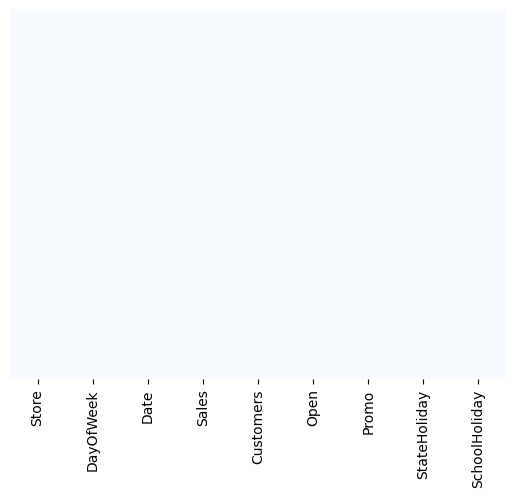

In [13]:
# Let's see if we have any missing data, luckily we don't!
 # sns.heatmap(sale_train.isnull(), yticklabels = False, cbar = False, cmap="Blues")
sns.heatmap(sale_train.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

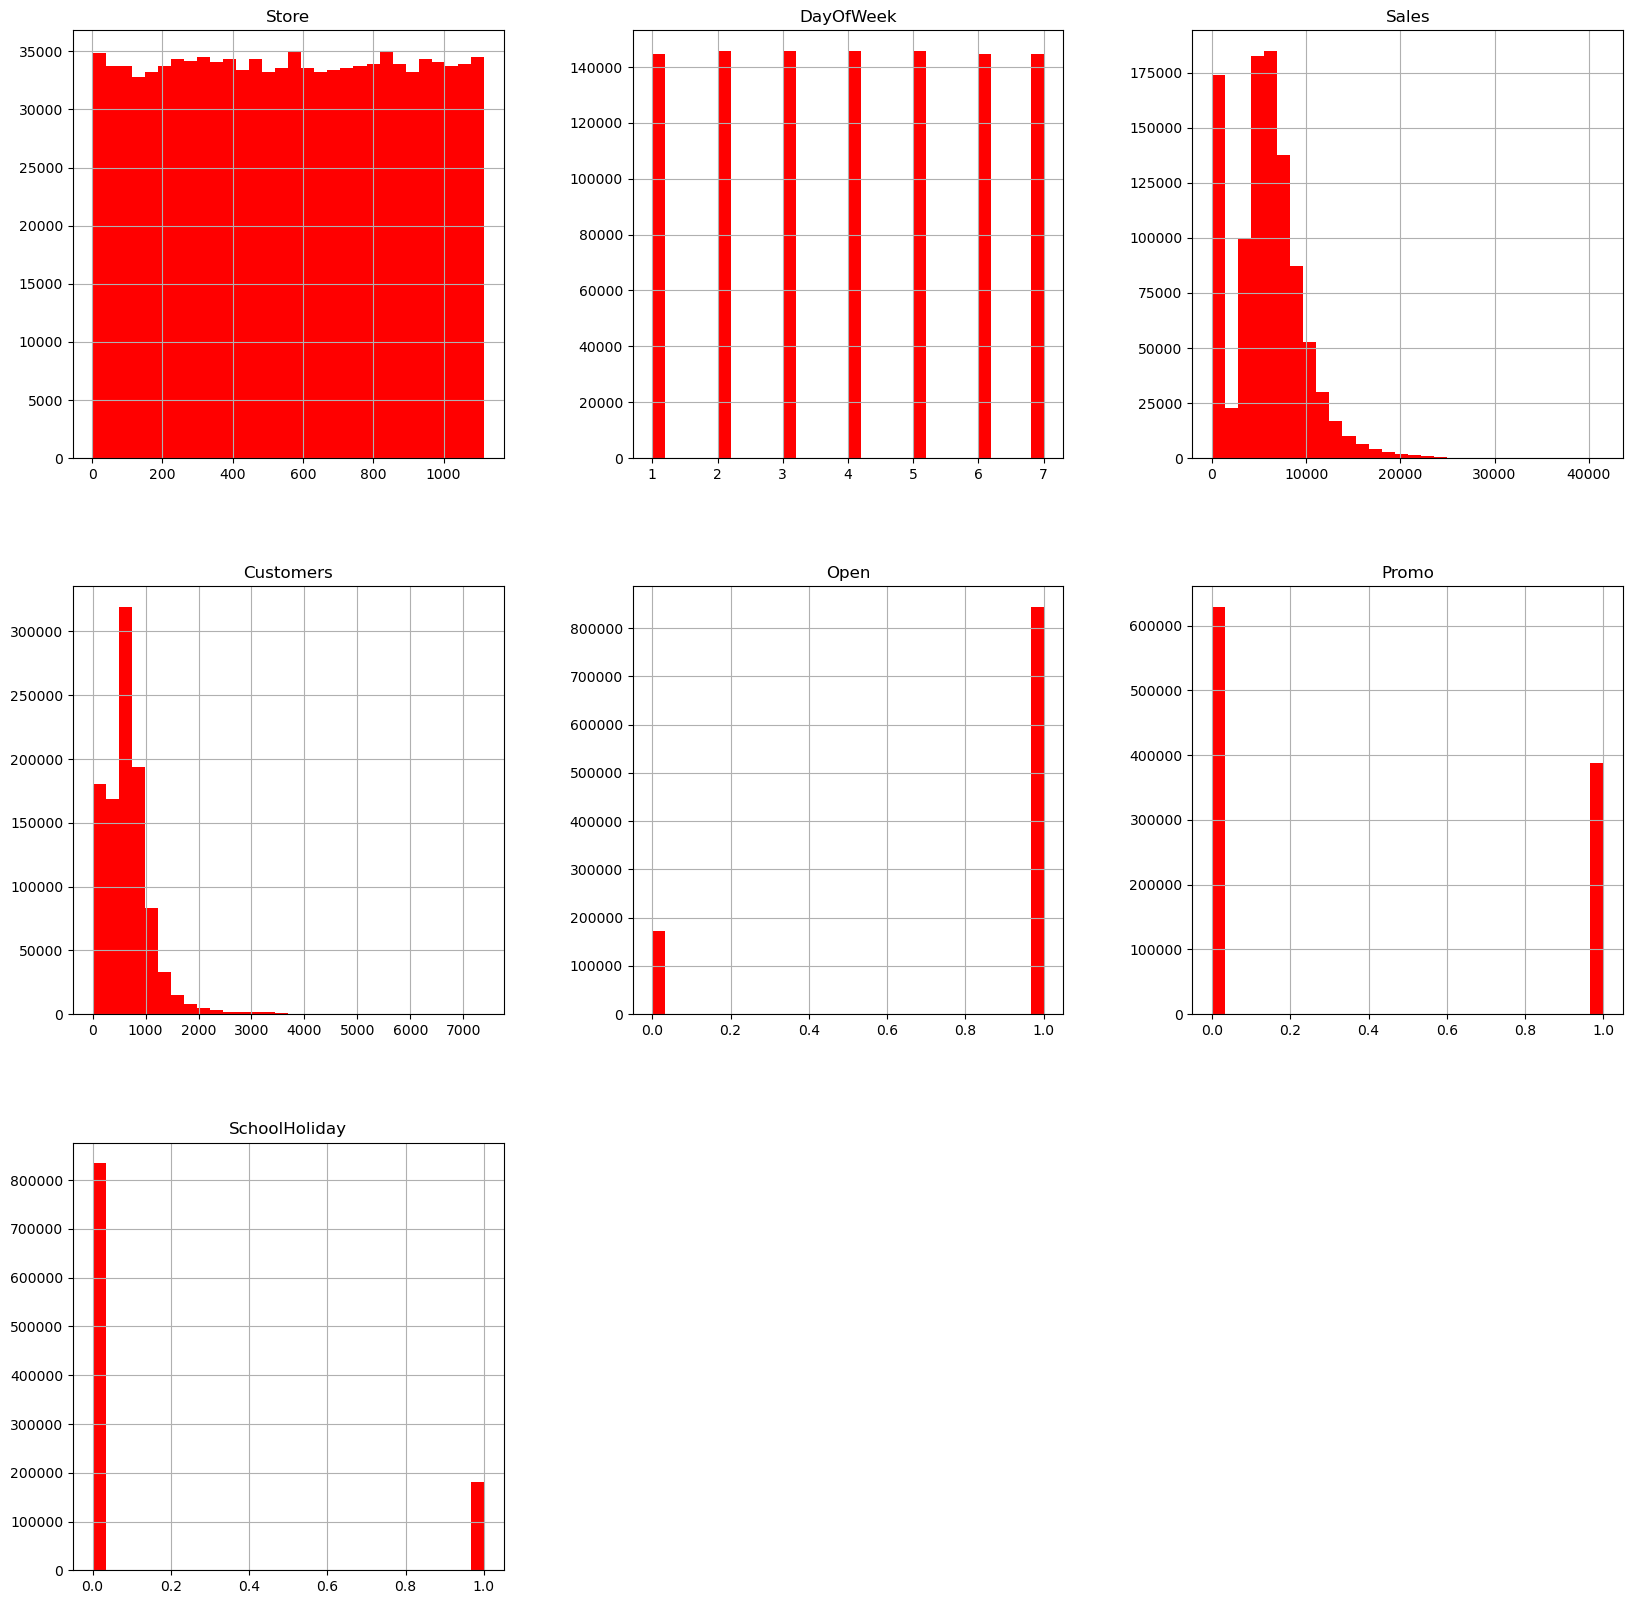

In [14]:
sale_train.hist(bins = 30, figsize = (20,20), color = 'r')
plt.show()
# Average 600 customers per day, maximum is 4500 (note that we can't see the outlier at 7388!)
# Data is equally distibuted across various Days of the week (~150000 observations x 7 day = ~1.1 million observation) 
# Stores are open ~80% of the time
# Data is equally distributed among all stores (no bias)
# Promo #1 was running ~40% of the time 
# Average sales around 5000-6000 Euros
# School holidays are around ~18% of the time

In [15]:
print(sale_train['Customers'].max())

7388


In [16]:
print(sale_train['Customers'].min())

0


In [17]:
# Let's see how many stores are open and closed! 
closed_train = sale_train[sale_train['Open'] == 0]
open_train   = sale_train[sale_train['Open'] == 1]

In [18]:
# Count the number of stores that are open and closed
print("Total =", len(sale_train))
print("Number of closed stores =", len(closed_train))
print("Number of open stores =", len(open_train))

Total = 1017209
Number of closed stores = 172817
Number of open stores = 844392


In [19]:
# only keep open stores and remove closed stores
sale_train = sale_train[sale_train['Open'] == 1]

In [20]:
sale_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [21]:
# Let's drop the open column since it has no meaning now
sale_train.drop(['Open'], axis=1, inplace=True)

In [22]:
sale_train

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1
...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,0,a,1
1016827,733,2,2013-01-01,10765,2377,0,a,1
1016863,769,2,2013-01-01,5035,1248,0,a,1
1017042,948,2,2013-01-01,4491,1039,0,a,1


In [23]:
sale_train.describe()
# Average sales = 6955 Euros,	average number of customers = 762	(went up)

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


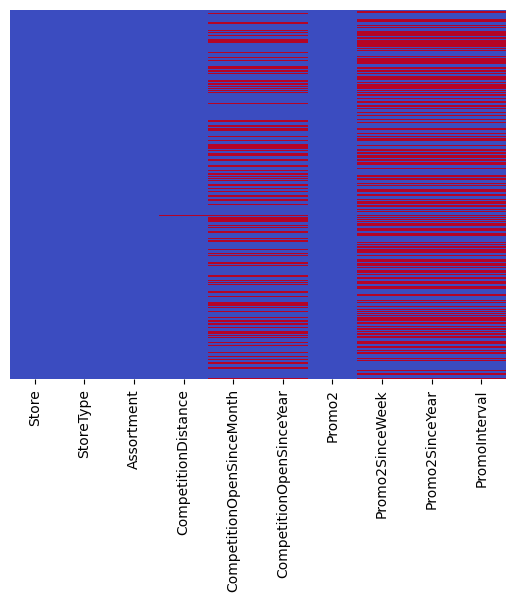

In [24]:
# Let's see if we have any missing data in the store information dataframe!
sns.heatmap(sale_store.isnull(), yticklabels = False, cbar = False, cmap="coolwarm")
plt.show()

In [25]:
# Let's take a look at the missing values in the 'CompetitionDistance'
# Only 3 rows are missing 

sale_store[sale_store['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [26]:
sale_store[sale_store['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [27]:
sale_store[sale_store['CompetitionOpenSinceYear'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [28]:
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']

for col in str_cols:
    if sale_store[col].dtype in ['int64', 'float64']:               ### Only process with numeric 
        median_value = sale_store[col].median()                     ### Calculate medium with cols
        sale_store[col].fillna(median_value, inplace=True)

In [29]:
sns.heatmap(sale_store.isnull(), yticklabels = False, cbar = False, cmap = 'coolwarm')

<Axes: >

In [30]:
# There are 3 rows with 'competitionDistance' values missing, let's fill them up with with average values of the 'CompetitionDistance' column
sale_store['CompetitionDistance'].fillna(sale_store['CompetitionDistance'].mean(), inplace = True)

In [31]:
sns.heatmap(sale_store.isnull(), yticklabels = False, cbar = False, cmap = 'coolwarm')

<Axes: >

In [32]:
sale_store['PromoInterval'].fillna(sale_store['PromoInterval'].mode()[0], inplace=True)

In [33]:
sns.heatmap(sale_store.isnull(), yticklabels = False, cbar = False, cmap = 'coolwarm')

<Axes: >

In [34]:
sale_store.hist(bins = 30, figsize = (20, 20), color = 'r')

# half of stores are involved in promo 2
# half of the stores have their competition at a distance of 0-3000m (3 kms away)

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'CompetitionDistance'}>,
        <Axes: title={'center': 'CompetitionOpenSinceMonth'}>],
       [<Axes: title={'center': 'CompetitionOpenSinceYear'}>,
        <Axes: title={'center': 'Promo2'}>,
        <Axes: title={'center': 'Promo2SinceWeek'}>],
       [<Axes: title={'center': 'Promo2SinceYear'}>, <Axes: >, <Axes: >]],
      dtype=object)

In [35]:
# Let's merge both data frames together based on 'store'
sales_all = pd.merge(sale_train, sale_store, how='inner', on='Store')

In [36]:
sales_all.to_csv('test.csv', index=False)

In [37]:
sales_all

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,682,2,2013-01-01,3375,566,0,a,1,b,a,150.0,9.0,2006.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
844388,733,2,2013-01-01,10765,2377,0,a,1,b,b,860.0,10.0,1999.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
844389,769,2,2013-01-01,5035,1248,0,a,1,b,b,840.0,8.0,2010.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
844390,948,2,2013-01-01,4491,1039,0,a,1,b,b,1430.0,8.0,2010.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"


In [38]:
correlations = sales_all.corr(numeric_only=True)['Sales'].sort_values() 
correlations

# customers and promo are positively correlated with the sales 
# Promo2 does not seem to be effective at all 

DayOfWeek                   -0.178736
Promo2                      -0.127596
CompetitionOpenSinceMonth   -0.036650
CompetitionDistance         -0.036343
Promo2SinceYear             -0.008097
Store                        0.007710
CompetitionOpenSinceYear     0.012699
SchoolHoliday                0.038617
Promo2SinceWeek              0.050956
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

In [39]:
correlations = sales_all.corr(numeric_only=True)
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)
# Customers/Prmo2 and sales are strongly correlated 

<Axes: >

In [40]:
# Let's separate the year and put it into a separate column 
sales_all['Year'] = pd.DatetimeIndex(sales_all['Date']).year

In [41]:
sales_all

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,682,2,2013-01-01,3375,566,0,a,1,b,a,150.0,9.0,2006.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2013
844388,733,2,2013-01-01,10765,2377,0,a,1,b,b,860.0,10.0,1999.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2013
844389,769,2,2013-01-01,5035,1248,0,a,1,b,b,840.0,8.0,2010.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013
844390,948,2,2013-01-01,4491,1039,0,a,1,b,b,1430.0,8.0,2010.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2013


In [42]:
# Let's do the same for the Day and Month
sales_all['Month'] = pd.DatetimeIndex(sales_all['Date']).month 
sales_all['Day'] = pd.DatetimeIndex(sales_all['Date']).day

In [43]:
# Let's take a look at the average sales and number of customers per month 
# 'groupby' works great by grouping all the data that share the same month column, then obtain the mean of the sales column  
# It looks like sales and number of customers peak around christmas timeframe

# Group by month and calculate mean sales
axis = sales_all.groupby('Month')[['Sales']].mean().plot(figsize=(10,5), marker='o', color='r')
axis.set_title('Average Sales Per Month')

plt.figure()

# Group by month and calculate mean customers
axis = sales_all.groupby('Month')[['Customers']].mean().plot(figsize=(10,5), marker='^', color='b')
axis.set_title('Average Customers Per Month')

Text(0.5, 1.0, 'Average Customers Per Month')

In [44]:
# Let's take a look at the sales and customers per day of the month instead
# Minimum number of customers are generally around the 24th of the month 
# Most customers and sales are around 30th and 1st of the month

ax = sales_all.groupby('Day')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r') 
axis.set_title('Average Sales Per Day')


plt.figure()

ax = sales_all.groupby('Day')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b') 
axis.set_title('Average Sales Per Day')

Text(0.5, 1.0, 'Average Sales Per Day')

In [45]:
# Let's do the same for the day of the week  (note that 7 = Sunday)
axis = sales_all.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Day of the Week')

plt.figure()

axis = sales_all.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Average Customers Per Day of the Week')

Text(0.5, 1.0, 'Average Customers Per Day of the Week')

In [46]:
plt.figure(figsize=[15,10])

plt.subplot(211)
sns.barplot(x = 'Promo', y = 'Sales', data = sales_all)

plt.subplot(212)
sns.barplot(x = 'Promo', y = 'Customers', data = sales_all)

<Axes: xlabel='Promo', ylabel='Customers'>

In [47]:
plt.figure(figsize=[15,10])

plt.subplot(211)
sns.violinplot(x = 'Promo', y = 'Sales', data = sales_all)

plt.subplot(212)
sns.violinplot(x = 'Promo', y = 'Customers', data = sales_all)

<Axes: xlabel='Promo', ylabel='Customers'>

In [48]:
sales_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844392 entries, 0 to 844391
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844392 non-null  int64  
 1   DayOfWeek                  844392 non-null  int64  
 2   Date                       844392 non-null  object 
 3   Sales                      844392 non-null  int64  
 4   Customers                  844392 non-null  int64  
 5   Promo                      844392 non-null  int64  
 6   StateHoliday               844392 non-null  object 
 7   SchoolHoliday              844392 non-null  int64  
 8   StoreType                  844392 non-null  object 
 9   Assortment                 844392 non-null  object 
 10  CompetitionDistance        844392 non-null  float64
 11  CompetitionOpenSinceMonth  844392 non-null  float64
 12  CompetitionOpenSinceYear   844392 non-null  float64
 13  Promo2                     84

In [49]:
sales_all.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,7,31
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,7,31
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,7,31


In [50]:
print(sales_all.isnull().sum())

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Year                         0
Month                        0
Day                          0
dtype: int64


In [51]:
sales_all.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,7,31
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,7,31
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,7,31


In [52]:
sales_all.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,7,31
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,7,31
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,7,31


In [53]:
print(len(sales_all['StoreType'].unique()))
print(len(sales_all['Assortment'].unique()))

4
3


In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

sales_all['StoreType'] = le.fit_transform(sales_all['StoreType'])
sales_all['Assortment'] = le.fit_transform(sales_all['Assortment'])

In [55]:
sales_all.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,2,0,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,7,31
1,2,5,2015-07-31,6064,625,1,0,1,0,0,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,2015-07-31,8314,821,1,0,1,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,2015-07-31,13995,1498,1,0,1,2,2,620.0,9.0,2009.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,7,31
4,5,5,2015-07-31,4822,559,1,0,1,0,0,29910.0,4.0,2015.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,7,31


In [56]:
sales_all = sales_all.drop(['Date', 'PromoInterval'], axis=1)

In [57]:
sales_all.head()

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day
0,1,5,5263,555,1,0,1,2,0,1270.0,9.0,2008.0,0,22.0,2012.0,2015,7,31
1,2,5,6064,625,1,0,1,0,0,570.0,11.0,2007.0,1,13.0,2010.0,2015,7,31
2,3,5,8314,821,1,0,1,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,2015,7,31
3,4,5,13995,1498,1,0,1,2,2,620.0,9.0,2009.0,0,22.0,2012.0,2015,7,31
4,5,5,4822,559,1,0,1,0,0,29910.0,4.0,2015.0,0,22.0,2012.0,2015,7,31


In [58]:
sales_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844392 entries, 0 to 844391
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844392 non-null  int64  
 1   DayOfWeek                  844392 non-null  int64  
 2   Sales                      844392 non-null  int64  
 3   Customers                  844392 non-null  int64  
 4   Promo                      844392 non-null  int64  
 5   StateHoliday               844392 non-null  object 
 6   SchoolHoliday              844392 non-null  int64  
 7   StoreType                  844392 non-null  int32  
 8   Assortment                 844392 non-null  int32  
 9   CompetitionDistance        844392 non-null  float64
 10  CompetitionOpenSinceMonth  844392 non-null  float64
 11  CompetitionOpenSinceYear   844392 non-null  float64
 12  Promo2                     844392 non-null  int64  
 13  Promo2SinceWeek            84

In [59]:
sales_all['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [60]:
sales_all['StateHoliday'] = sales_all['StateHoliday'].replace({'0': 0, 'a': 1, 'b': 2, 'c': 3}).astype('float64')

In [61]:
sales_all = sales_all.drop(['Store'], axis=1)

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_sales_all = sc.fit_transform(sales_all)

In [63]:
sc_sales_all

array([[ 0.8584143 , -0.54523139, -0.51773228, ...,  1.50279585,
         0.34725843,  1.74634684],
       [ 0.8584143 , -0.28719496, -0.34326764, ...,  1.50279585,
         0.34725843,  1.74634684],
       [ 0.8584143 ,  0.43762647,  0.14523335, ...,  1.50279585,
         0.34725843,  1.74634684],
       ...,
       [-0.88203968, -0.61867996,  1.20946765, ..., -1.07034606,
        -1.45783411, -1.70850082],
       [-0.88203968, -0.79392568,  0.68856608, ..., -1.07034606,
        -1.45783411, -1.70850082],
       [-0.88203968, -0.32037568,  1.60076691, ..., -1.07034606,
        -1.45783411, -1.70850082]])

In [64]:
sc_sales_all.shape

(844392, 17)

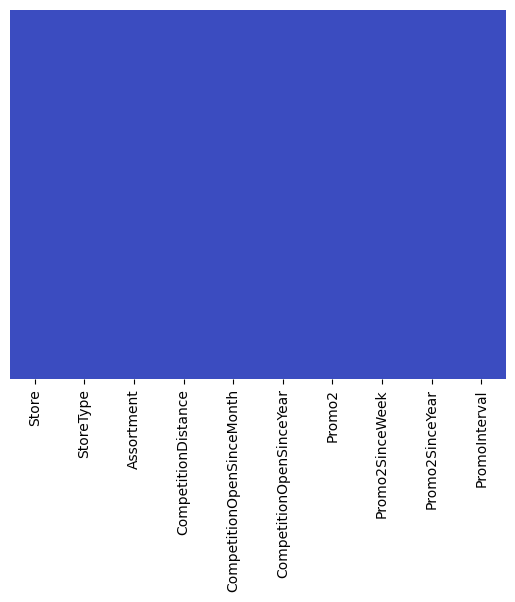

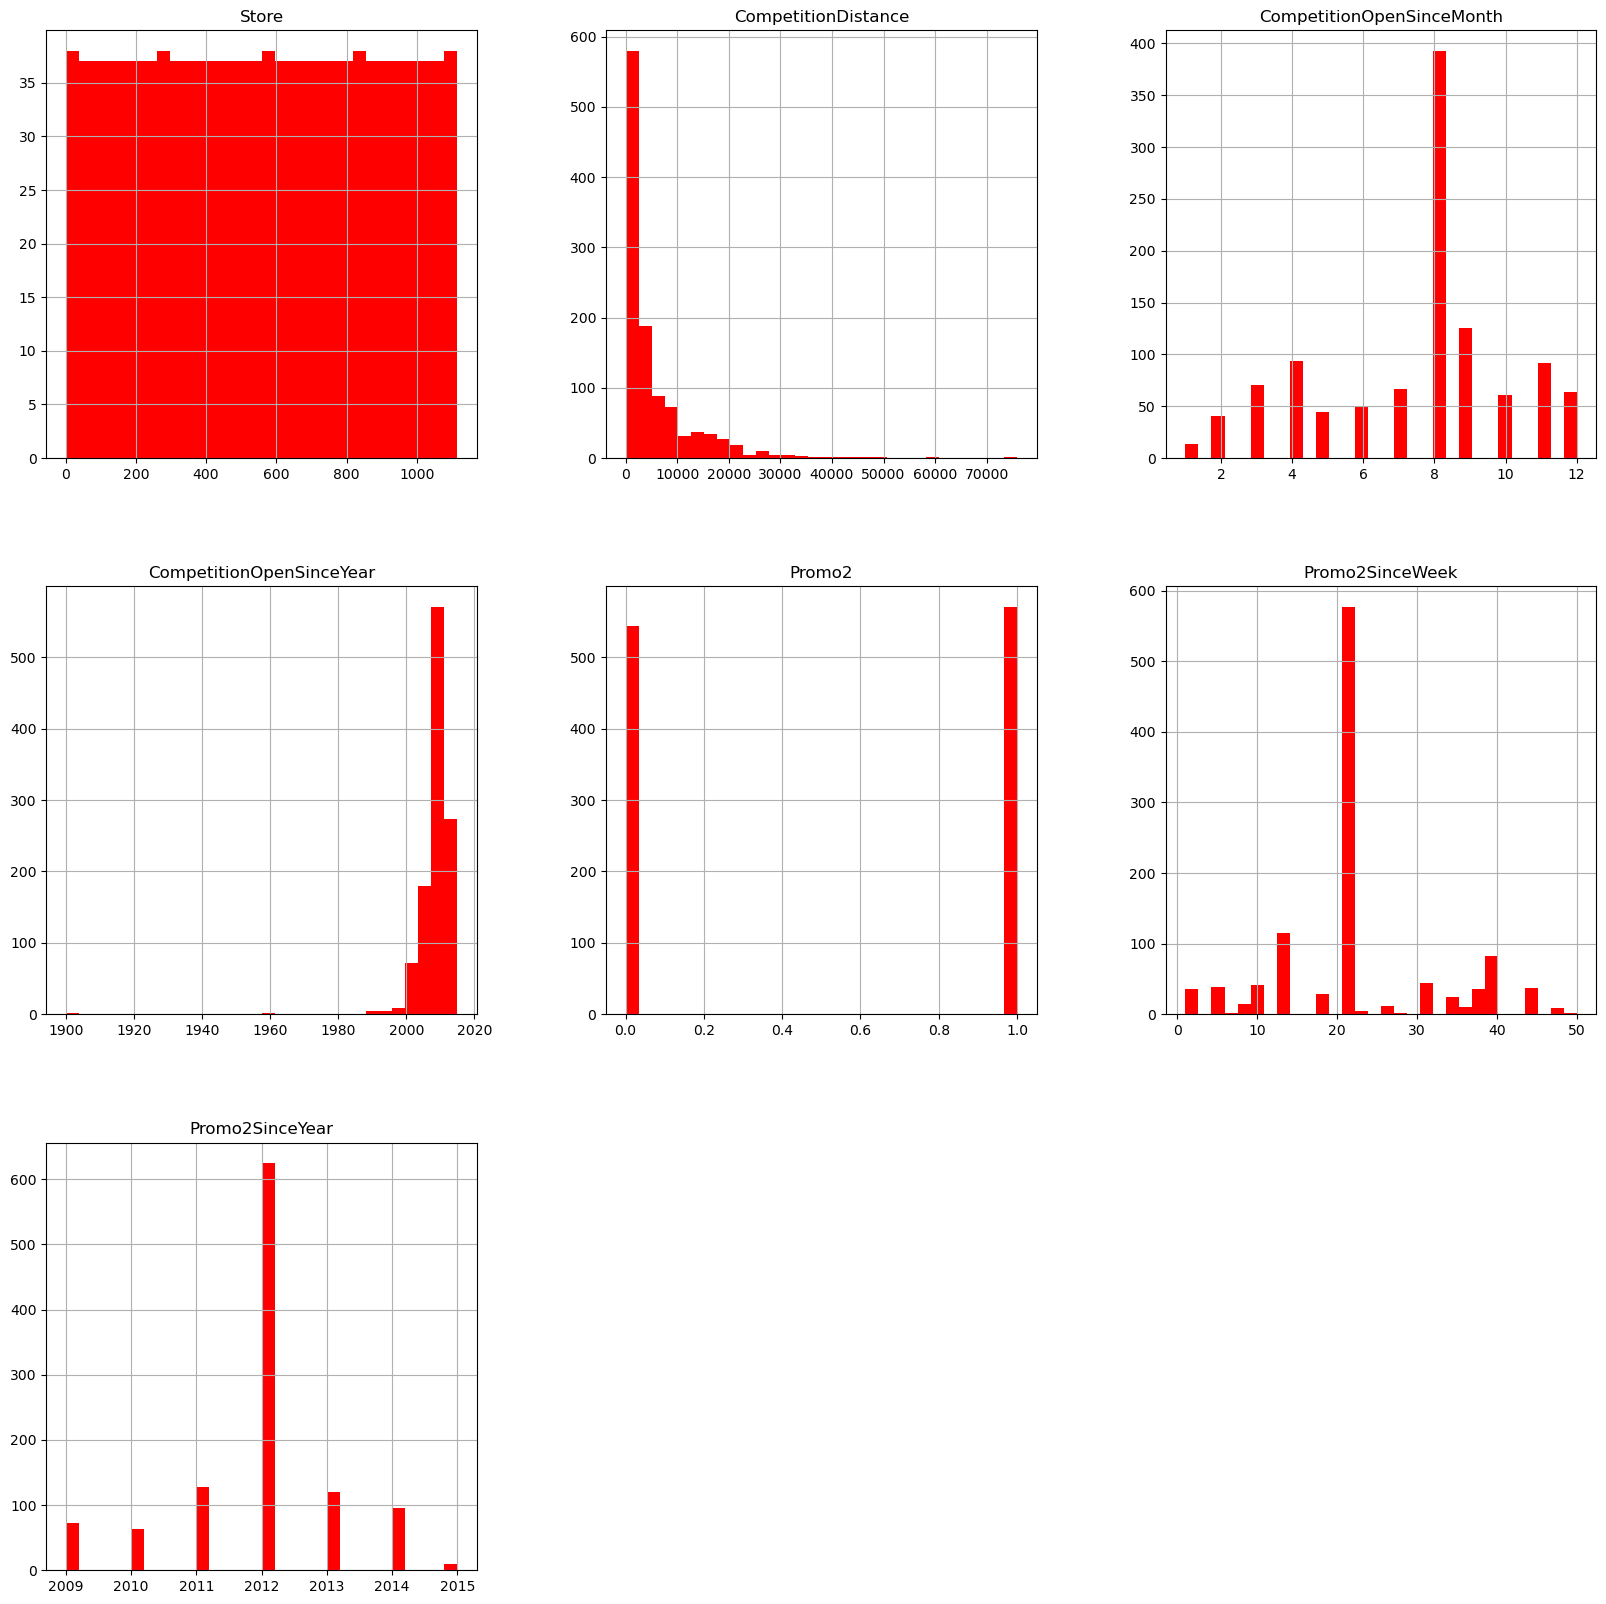

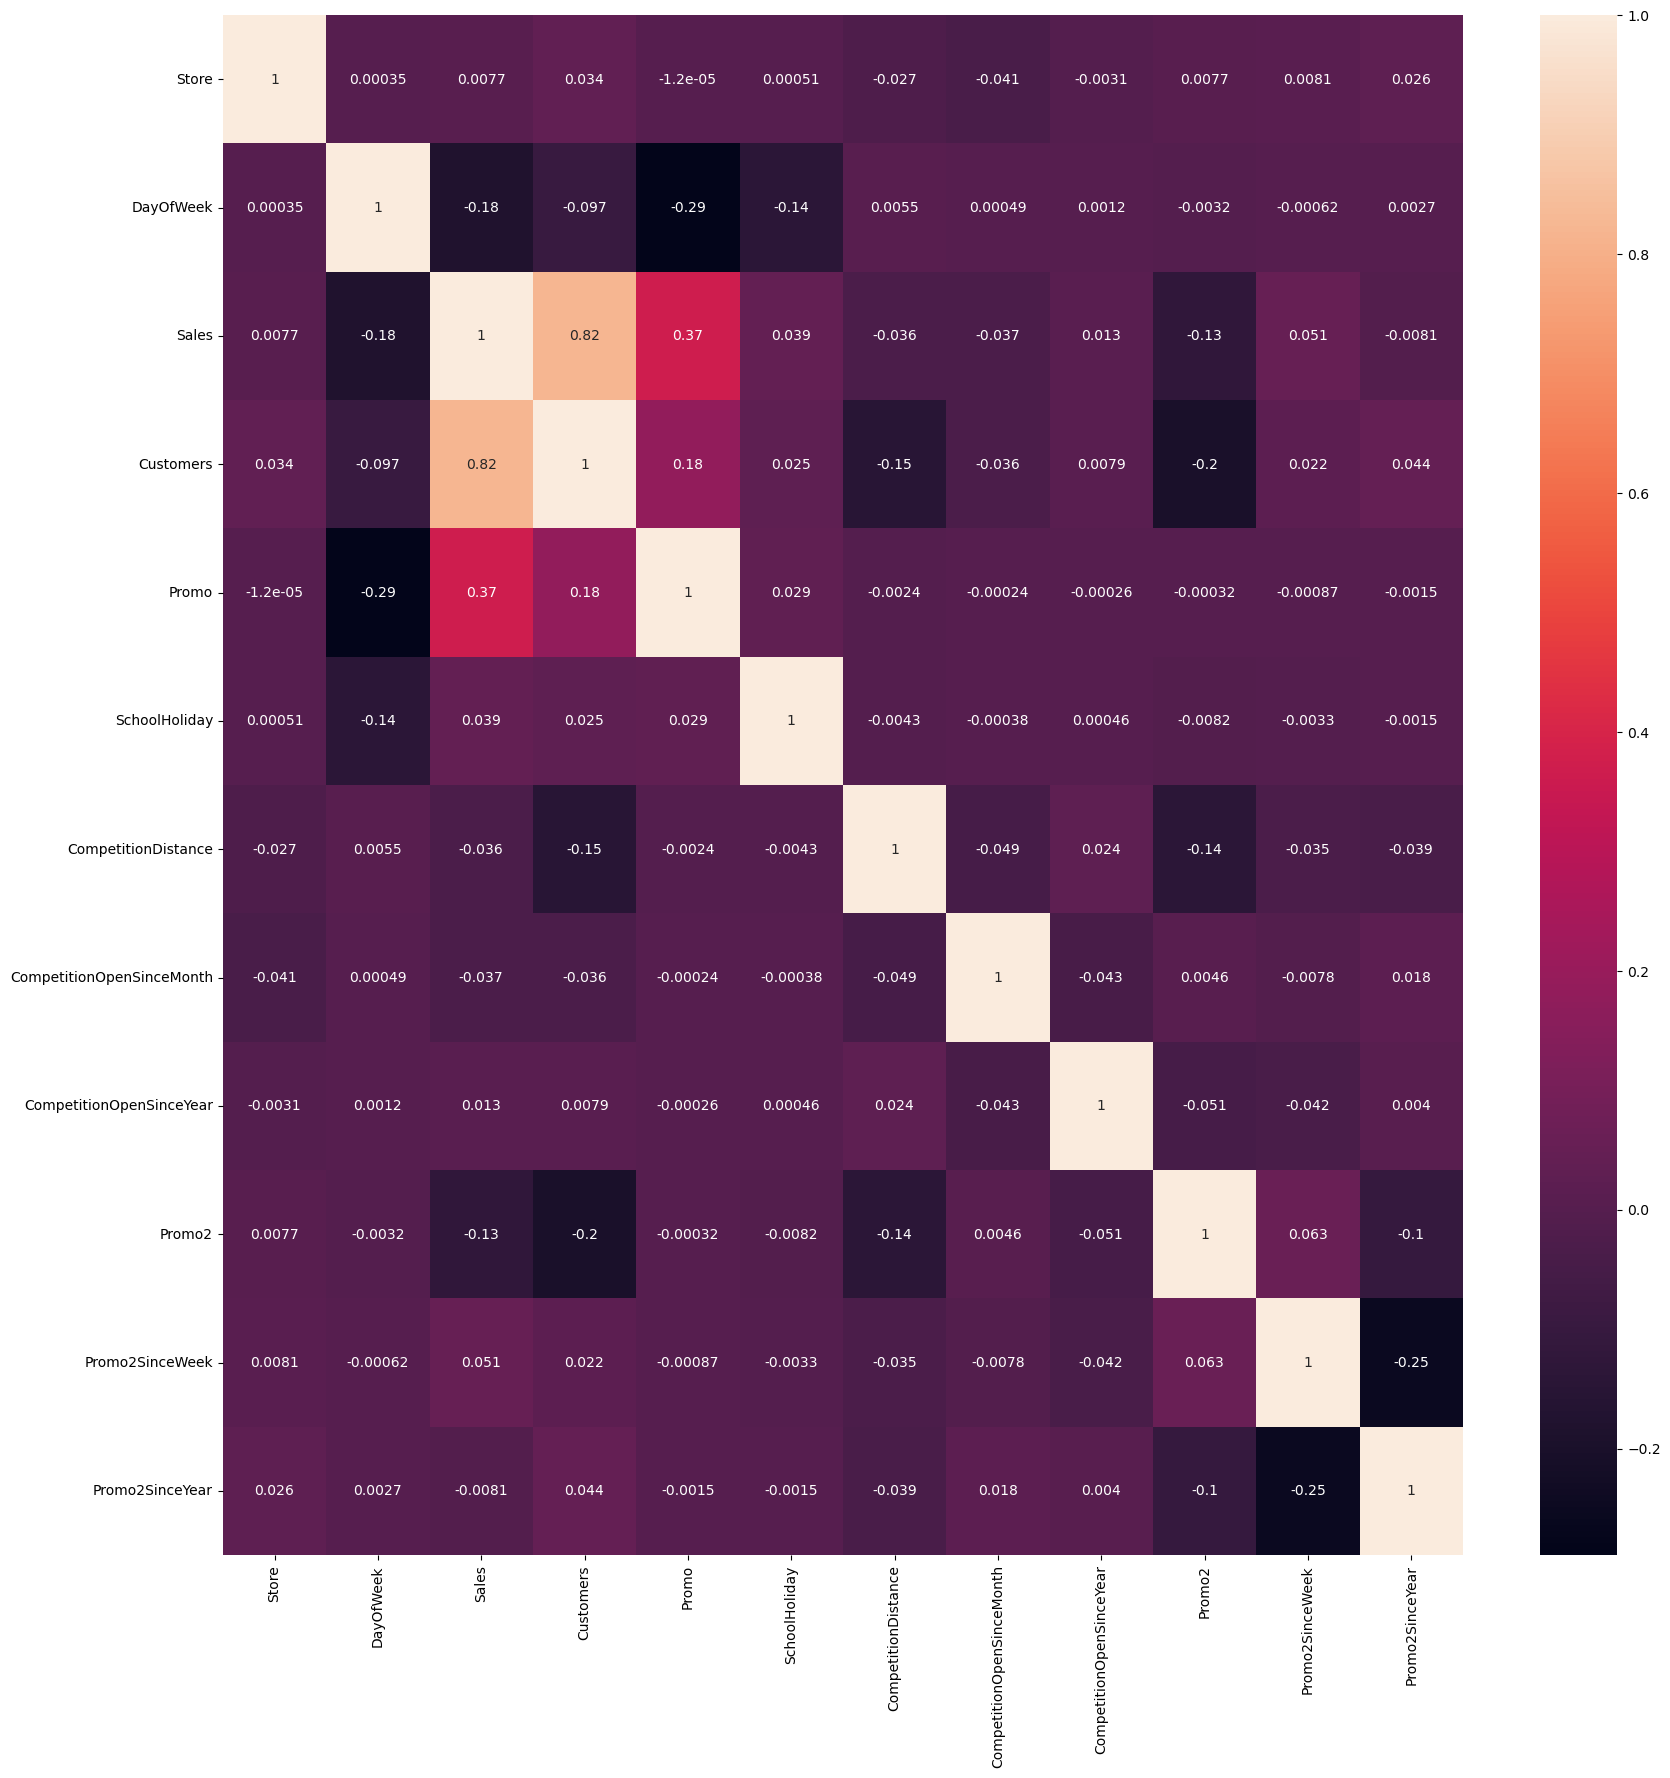

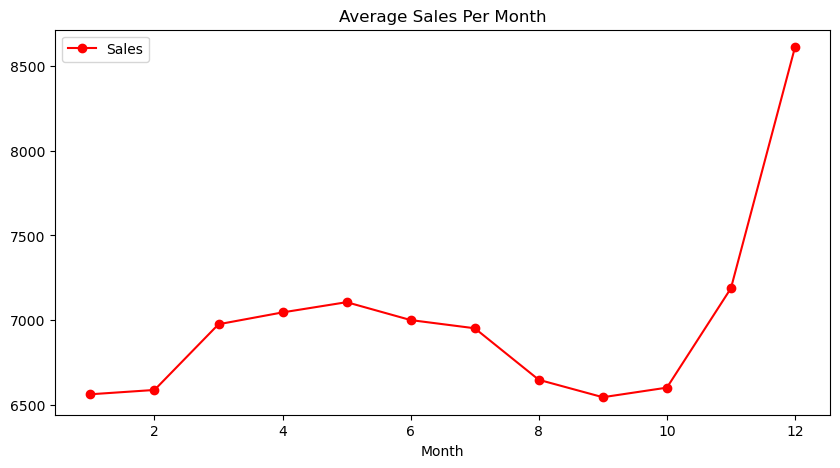

<Figure size 640x480 with 0 Axes>

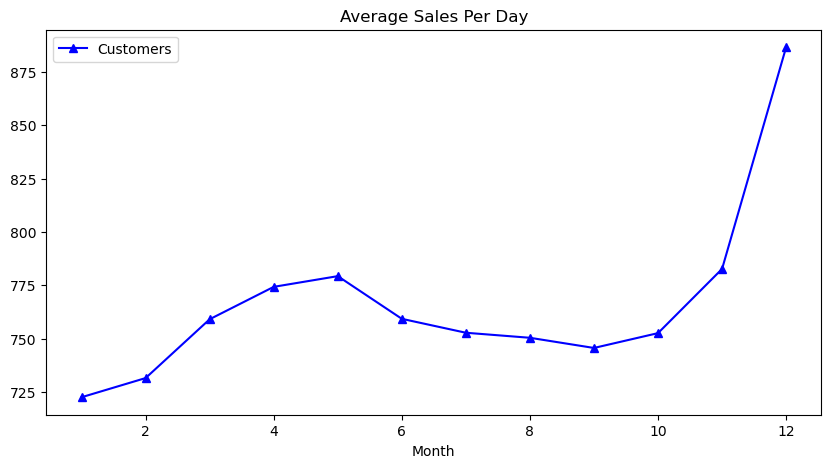

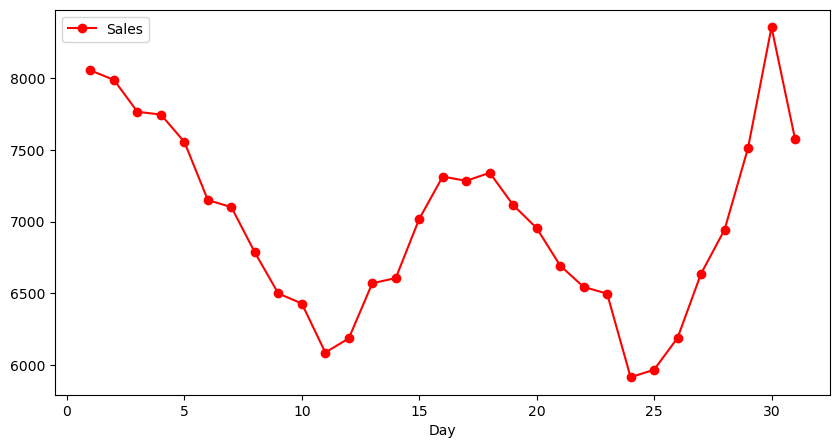

<Figure size 640x480 with 0 Axes>

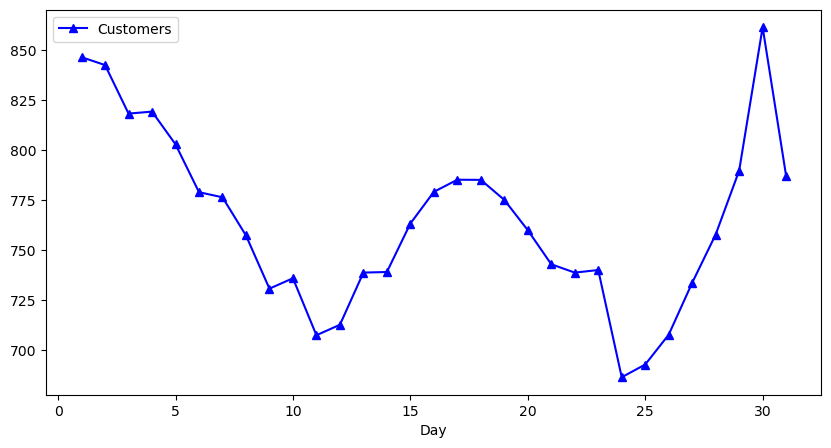

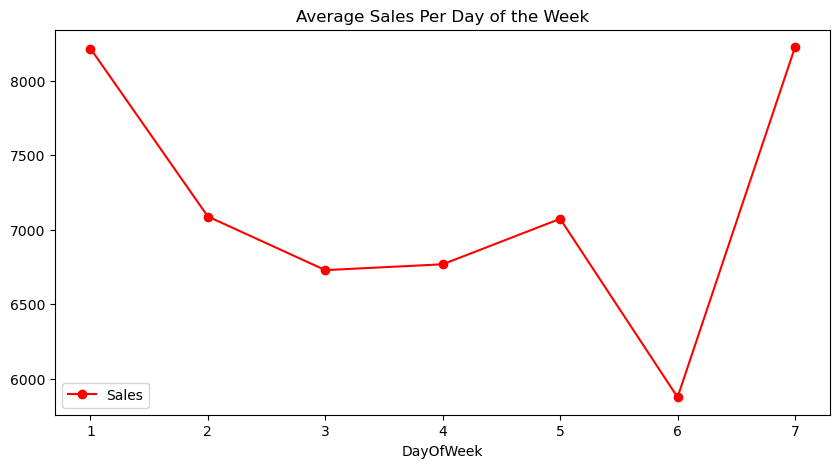

<Figure size 640x480 with 0 Axes>

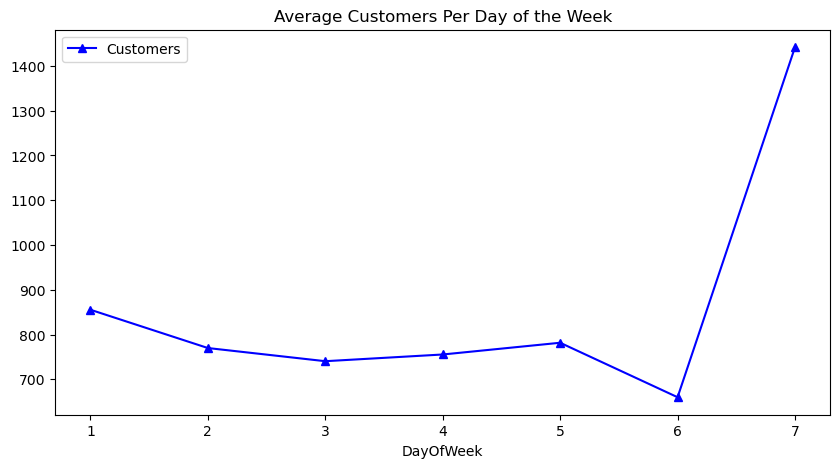

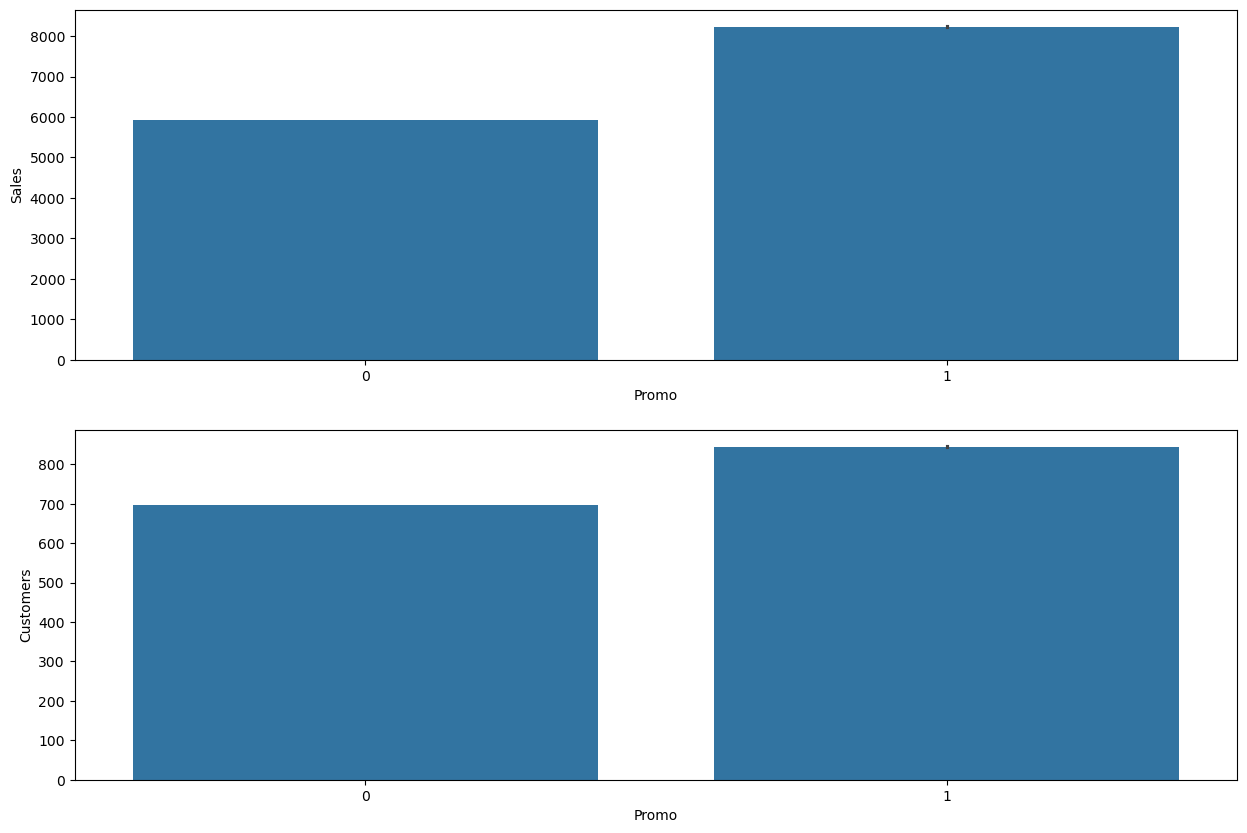

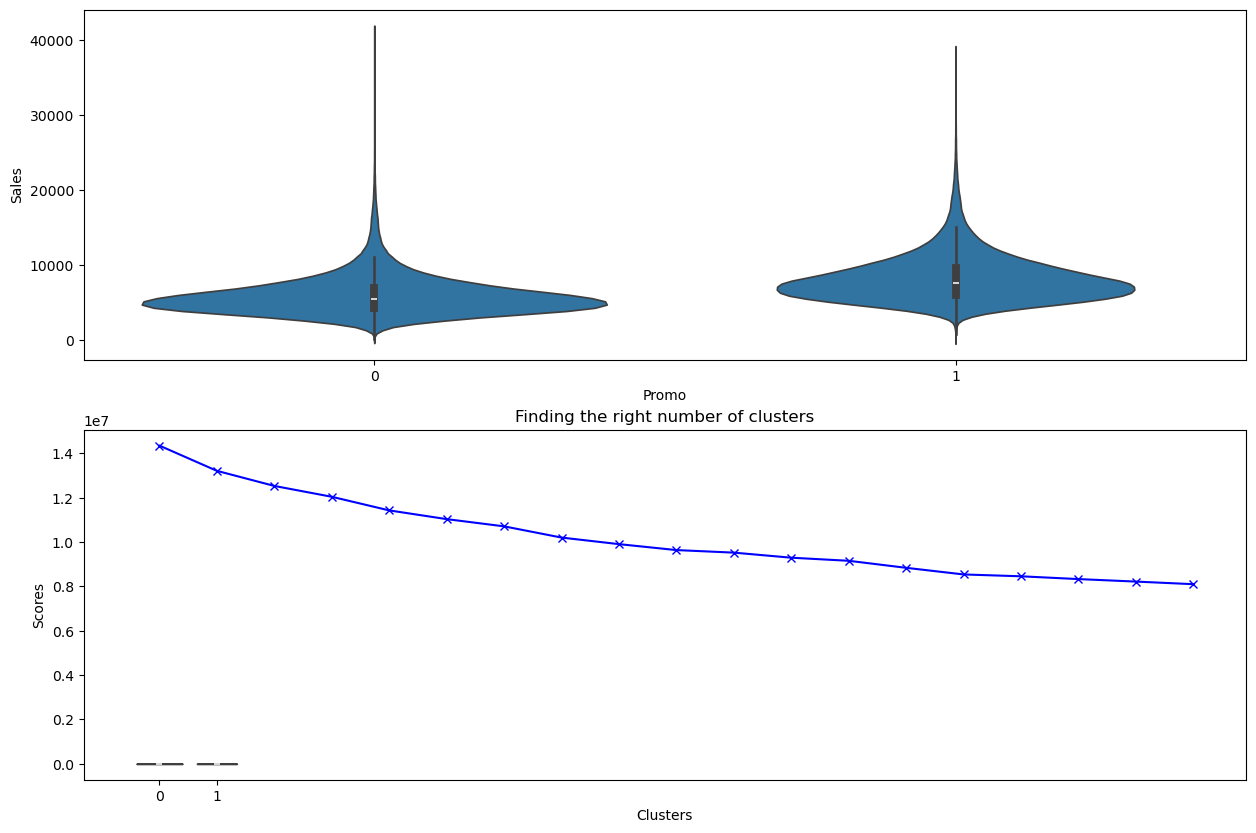

In [65]:
from sklearn.cluster import KMeans

scores_1 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
  kmeans.fit(sc_sales_all)
  scores_1.append(kmeans.inertia_) 

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

In [66]:
kmeans = KMeans(17)
kmeans.fit(sc_sales_all)
labels = kmeans.labels_

In [67]:
data_clt = kmeans.cluster_centers_.shape
print(data_clt)

(17, 17)


In [68]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [sales_all.columns])
cluster_centers           

,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day
0,0.579707,-0.245499,-0.255532,-0.775042,-0.026965,-0.468277,0.612266,0.823416,0.029588,0.128379,0.125825,-0.290915,0.115427,0.127194,-0.718250,1.003580,0.032922
1,0.600811,-0.255523,-0.312215,-0.873123,-0.028609,-0.411147,0.749819,0.847994,0.041806,0.155671,0.114037,-0.224814,0.214454,0.176058,0.854122,-0.742434,0.267219
2,-0.305591,-0.142683,-0.119757,0.014340,-0.018665,2.041038,-0.063695,-0.078328,-0.146896,0.037033,0.013811,-0.097945,-0.118636,0.170290,-0.167349,0.367211,0.177578
3,-0.007465,0.359561,-0.025250,-0.001923,-0.029796,-0.011210,0.339368,0.176806,-0.092296,-0.548422,-15.118809,1.002635,2.187312,0.856909,-0.017029,-0.082648,0.004374
4,-0.419123,1.988190,1.846685,0.542322,-0.022524,0.114326,-0.436461,0.132227,-0.328751,-0.235501,0.076998,-0.485704,-0.002085,0.109439,-0.040032,0.091552,-0.001689
5,-0.371835,0.313105,0.237116,0.972413,-0.024709,-0.489509,-0.459668,-0.362004,-0.220767,0.113698,-0.031796,-0.195565,-0.099843,0.187144,-0.574016,1.202742,-0.451830
6,-0.894520,-0.467541,-0.154447,-0.881516,-0.023559,-0.488338,-0.505506,-0.464855,-0.242487,0.477060,-0.072897,-0.455480,0.089184,0.291771,0.137803,-0.435995,0.269709
7,0.051230,-0.192888,-0.183977,-0.032022,0.054223,-0.044793,-0.423732,0.567745,3.564155,-0.337537,0.274716,-0.977217,-0.074770,0.121101,-0.004312,0.005946,-0.004090
8,1.183396,-0.604538,-0.338283,-0.856929,-0.025766,-0.472078,-0.636631,-0.781180,-0.296114,0.658041,-0.140207,-0.325531,0.055160,0.334109,-0.136856,-0.060404,0.025710
9,0.073490,3.487305,4.967564,0.116757,0.258041,-0.026344,-0.467735,0.182251,-0.601144,-0.034736,-0.037405,-0.593191,0.239394,0.071526,-0.001615,0.155194,-0.060823


In [69]:
cluster_centers = sc.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [sales_all.columns])
cluster_centers

,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day
0,4.519596,6193.432612,660.201982,0.061068,1.346801e-04,0.008562,2.040154,1.754209,5688.609882,7.814911,2009.737816,0.353228,23.776700,2012.027340,2013.273670,9.181568,16.121558
1,4.555972,6162.317685,637.459369,0.012311,5.647059e-05,0.031134,2.227689,1.778616,5783.897745,7.887925,2009.679191,0.386278,24.764706,2012.084969,2014.495812,3.377939,18.156066
2,2.993619,6512.597439,714.678721,0.453481,5.295815e-04,1.000000,1.118573,0.858690,4312.153996,7.570536,2009.180711,0.449712,21.441415,2012.078166,2013.701863,7.066321,17.377671
3,3.507495,8071.667380,752.597430,0.445396,4.119968e-18,0.189151,1.668094,1.112063,4737.994290,6.004283,1933.917916,1.000000,44.448251,2012.887937,2013.818701,5.571021,15.873662
4,2.797924,13127.277803,1503.668916,0.715948,3.459833e-04,0.238750,0.610358,1.067791,2893.806341,6.841432,2009.494972,0.255833,22.604260,2012.006401,2013.800822,6.150049,15.821018
5,2.879434,7927.459587,857.865951,0.929752,2.419968e-04,0.000173,0.578718,0.576972,3736.009083,7.775634,2008.953882,0.400902,21.628915,2012.098043,2013.385778,9.843566,11.912242
6,1.978488,5504.167921,700.759977,0.008139,2.967170e-04,0.000636,0.516224,0.474832,3566.608014,8.747727,2008.749465,0.270945,23.514868,2012.221436,2013.939046,4.396520,18.177691
7,3.608666,6356.750017,688.911757,0.430433,3.997313e-03,0.175882,0.627712,1.500302,33255.817602,6.568458,2010.478334,0.010077,21.879073,2012.020155,2013.828586,5.865502,15.800168
8,5.560167,5078.898300,626.999965,0.020361,1.917546e-04,0.007060,0.337453,0.160690,3148.354098,9.231901,2008.414695,0.335919,23.175403,2012.271368,2013.725564,5.644958,16.058938
9,3.647036,17780.852054,2755.851342,0.504393,1.369429e-02,0.183171,0.567719,1.117470,769.327159,7.378532,2008.925987,0.202090,25.013536,2011.961688,2013.830682,6.361593,15.307528


In [70]:
labels.shape

(844392,)

In [71]:
labels.max()

16

In [72]:
labels.min()

0

In [73]:
y_kmeans = kmeans.fit_predict(sc_sales_all)
y_kmeans

array([14, 14, 14, ..., 12, 12, 12])

In [74]:
# concatenate the clusters labels to our original dataframe
df_cluster = pd.concat([sales_all, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head()

,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,cluster
0,5,5263,555,1,0.0,1,2,0,1270.0,9.0,2008.0,0,22.0,2012.0,2015,7,31,2
1,5,6064,625,1,0.0,1,0,0,570.0,11.0,2007.0,1,13.0,2010.0,2015,7,31,2
2,5,8314,821,1,0.0,1,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,2015,7,31,2
3,5,13995,1498,1,0.0,1,2,2,620.0,9.0,2009.0,0,22.0,2012.0,2015,7,31,4
4,5,4822,559,1,0.0,1,0,0,29910.0,4.0,2015.0,0,22.0,2012.0,2015,7,31,7


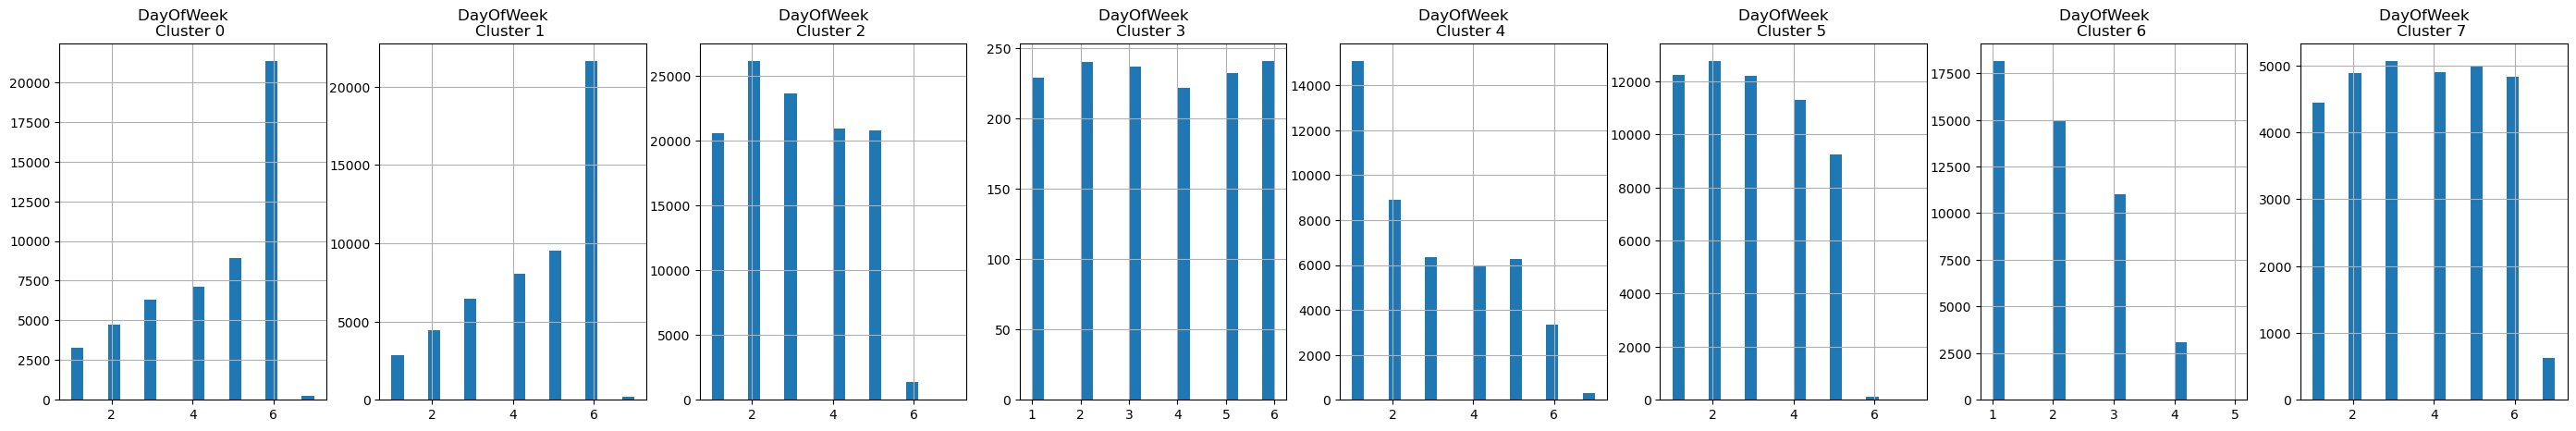

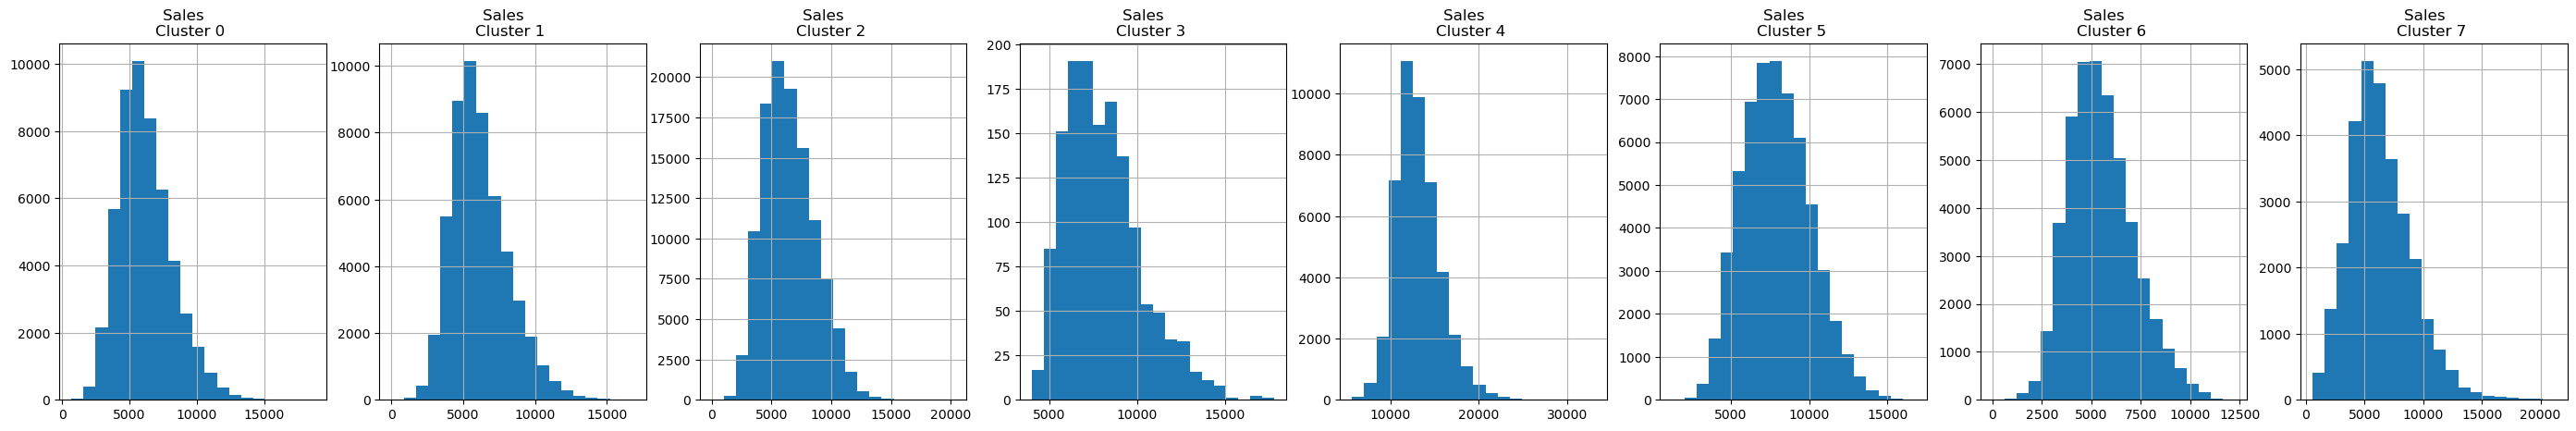

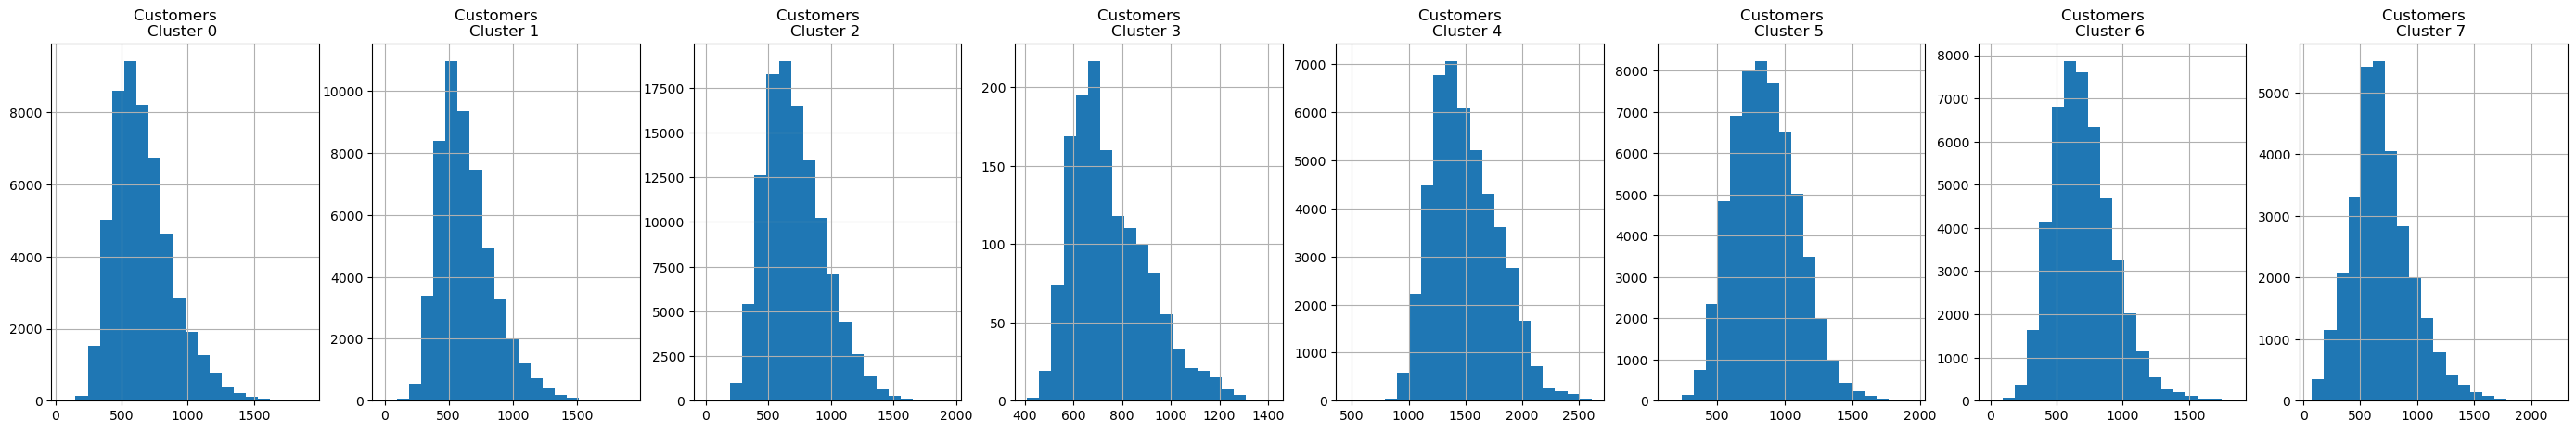

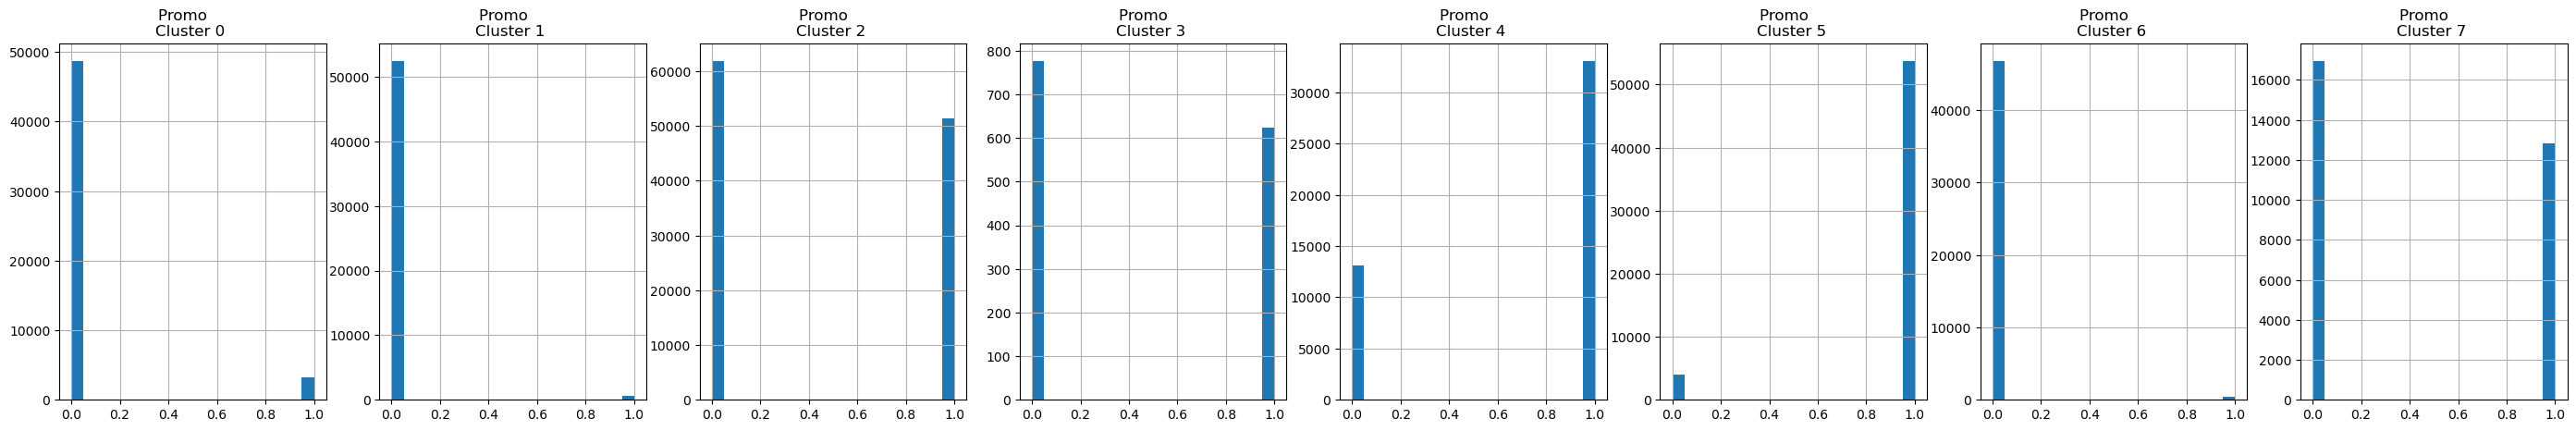

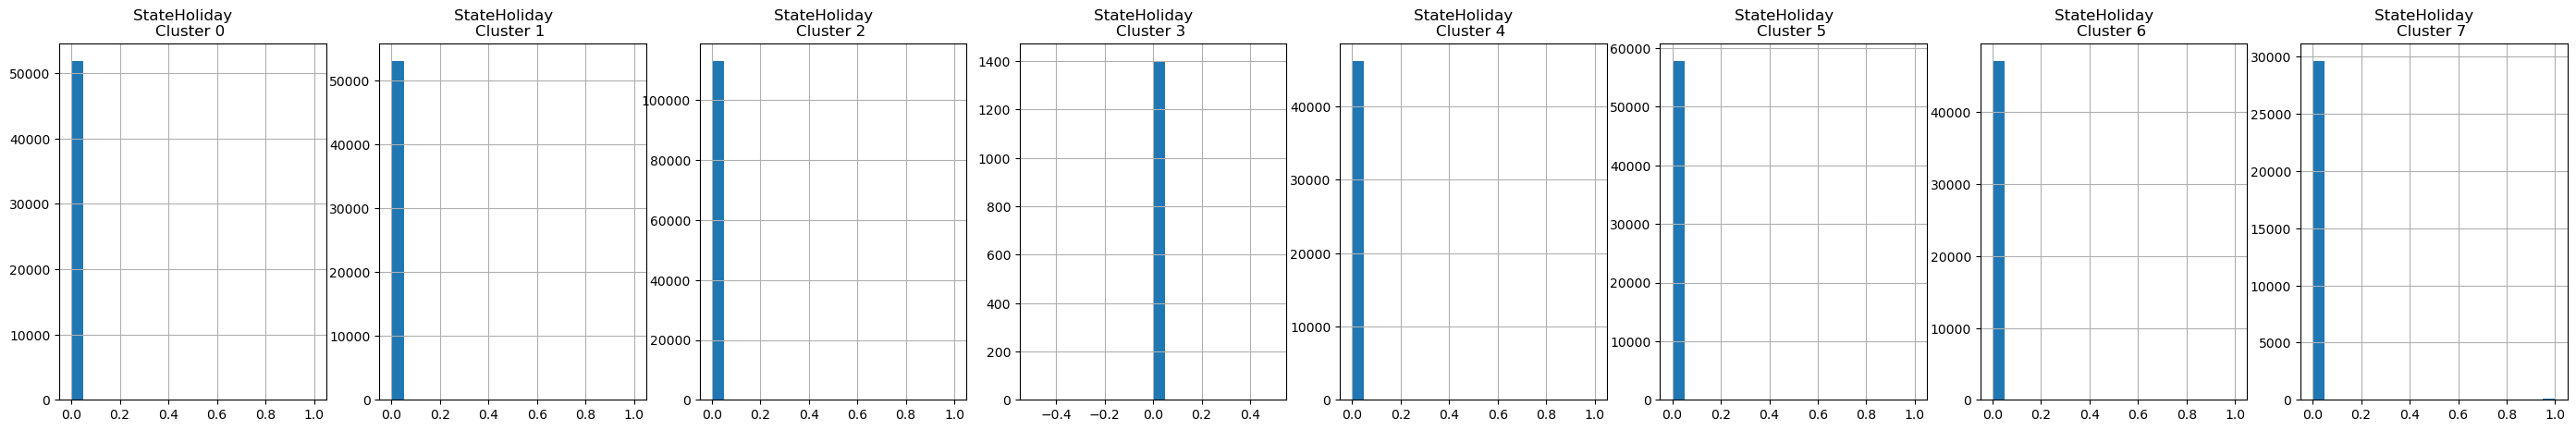

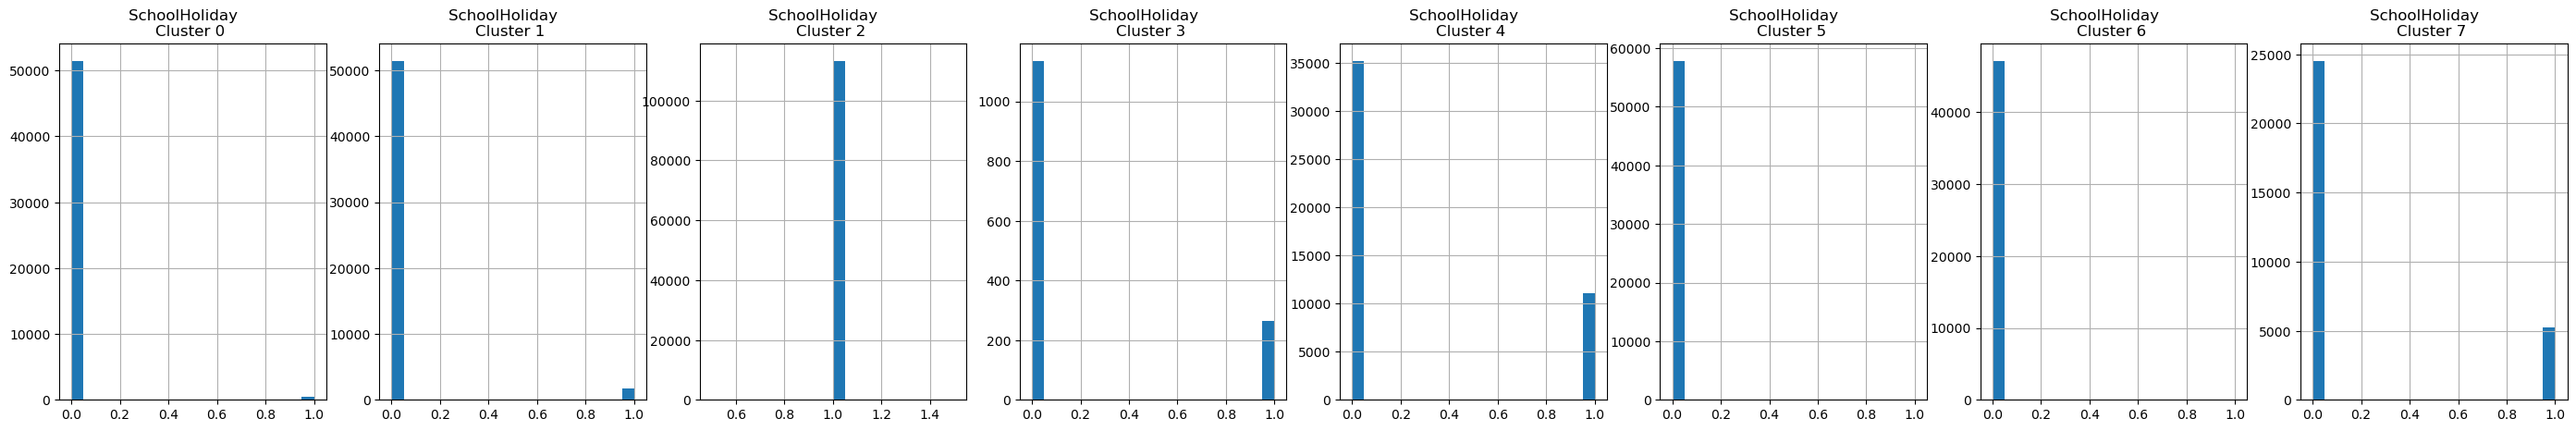

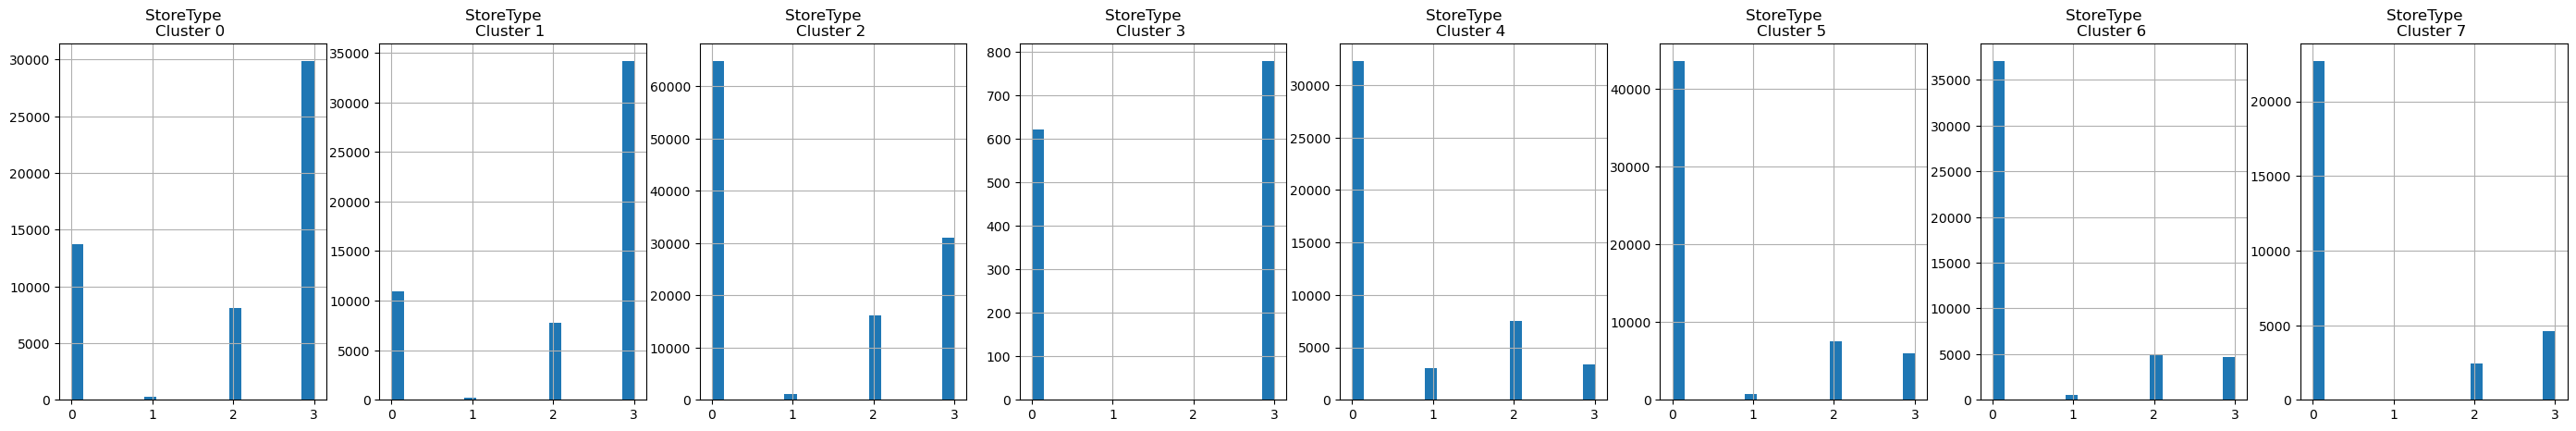

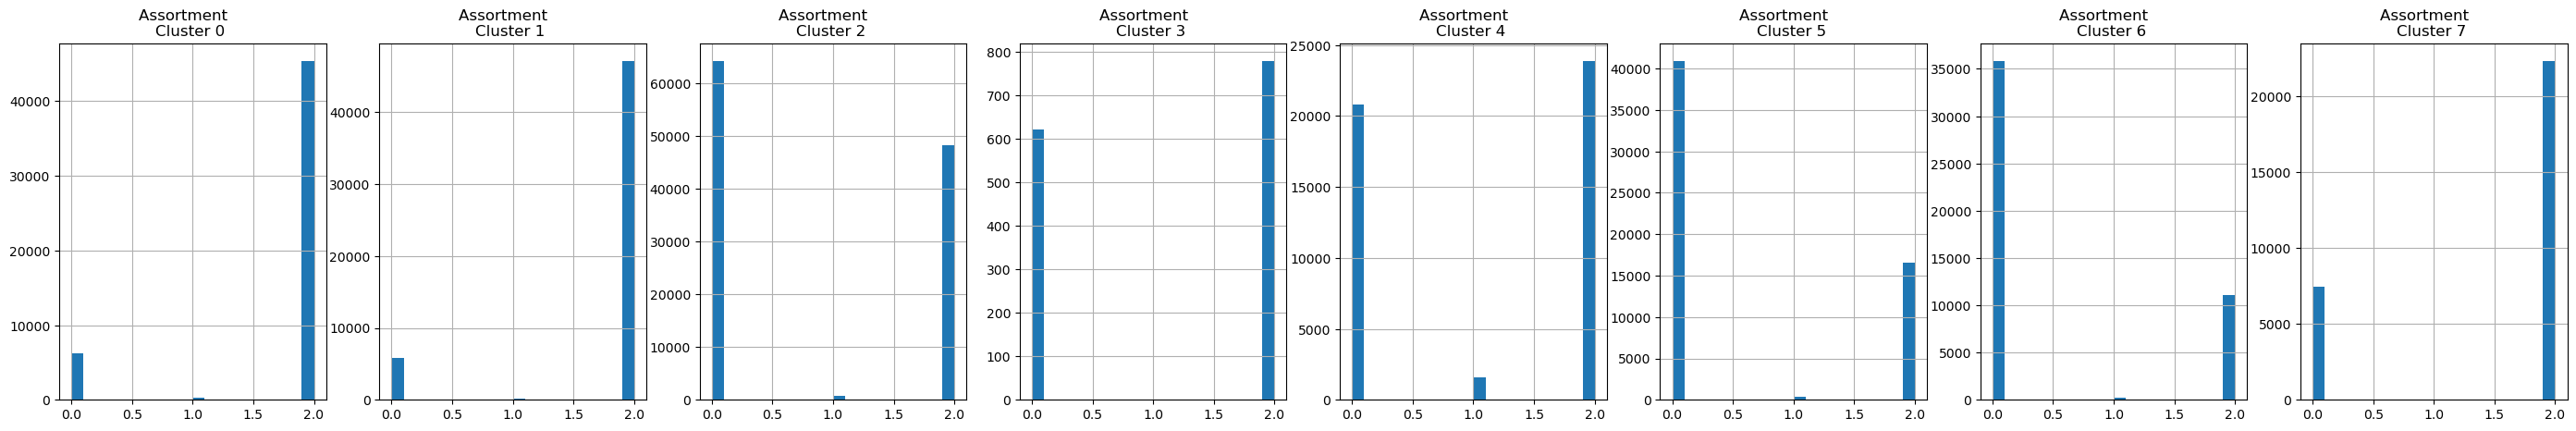

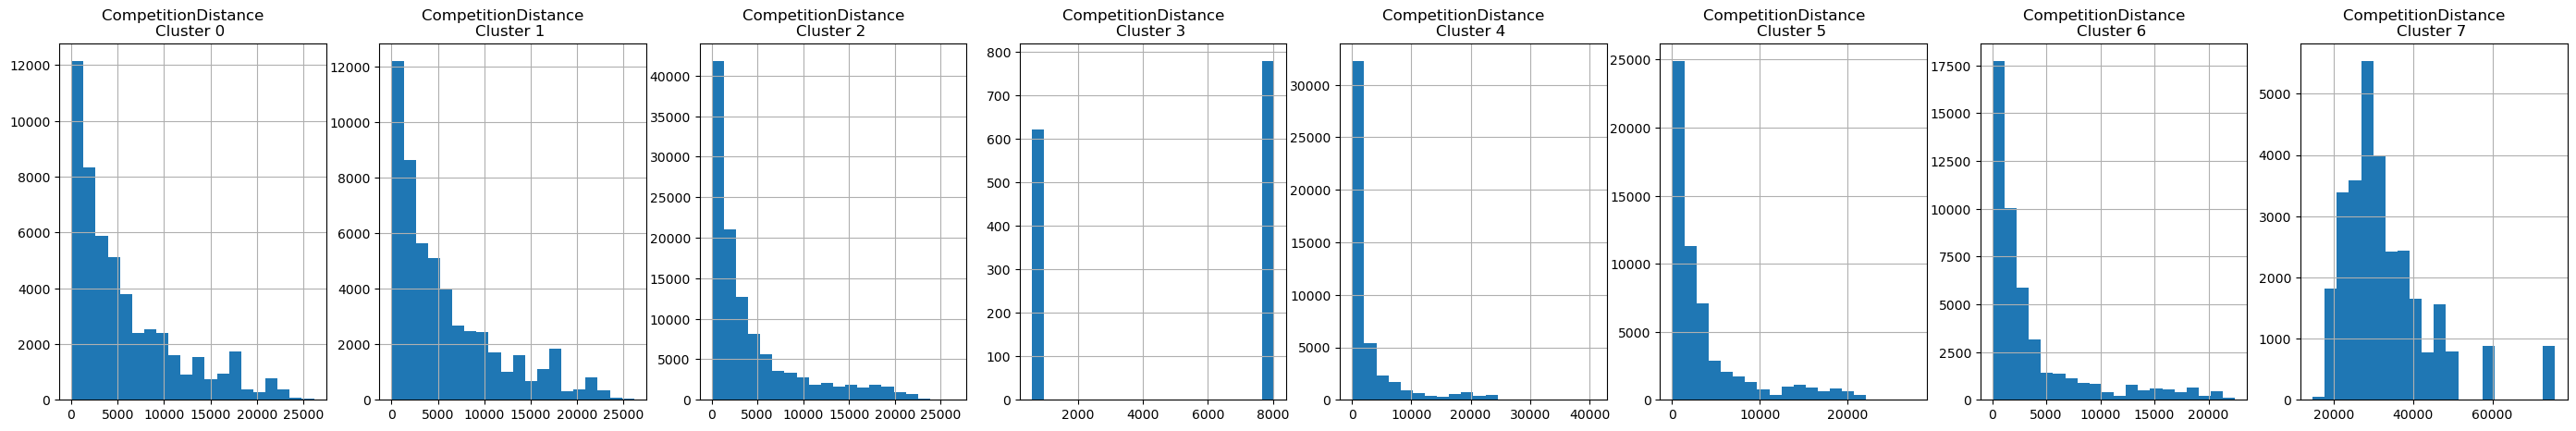

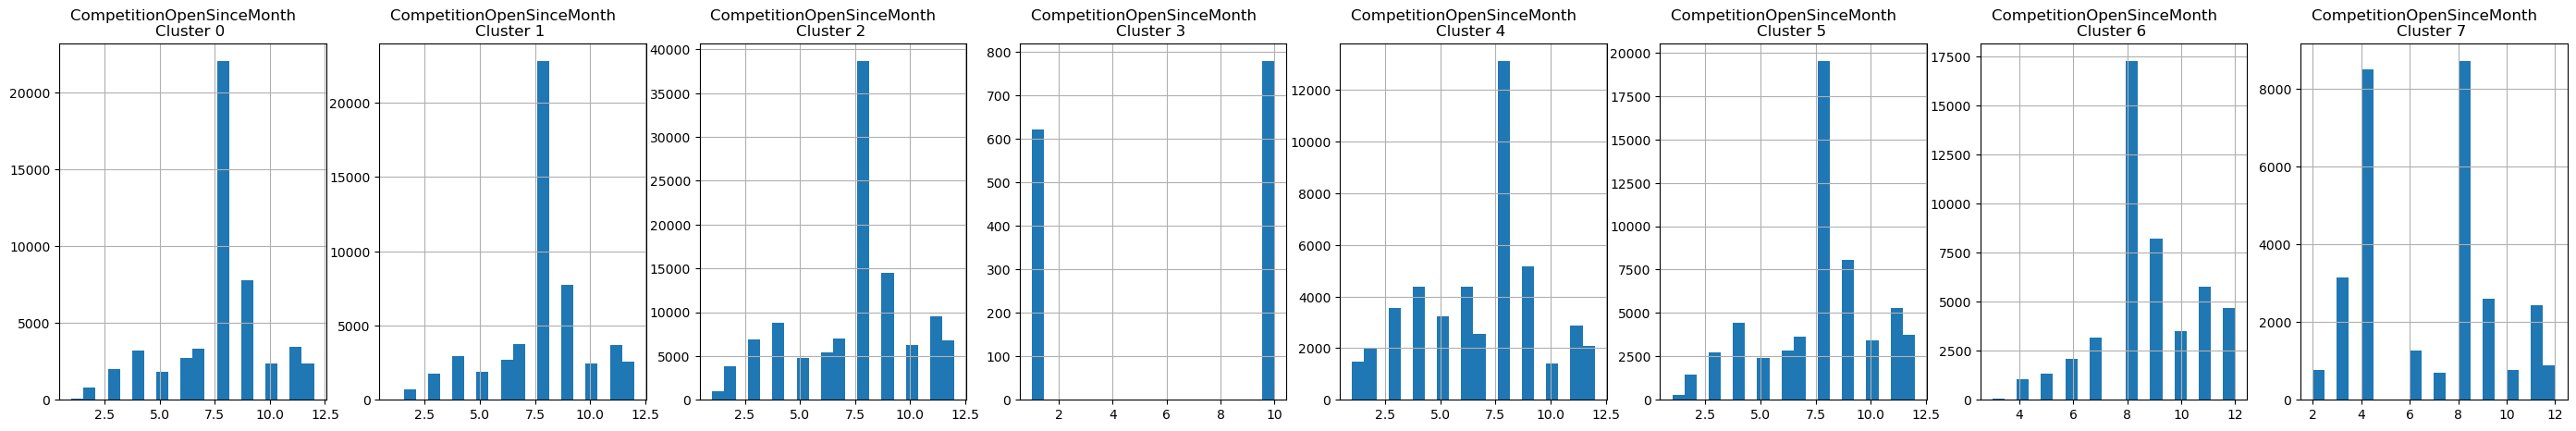

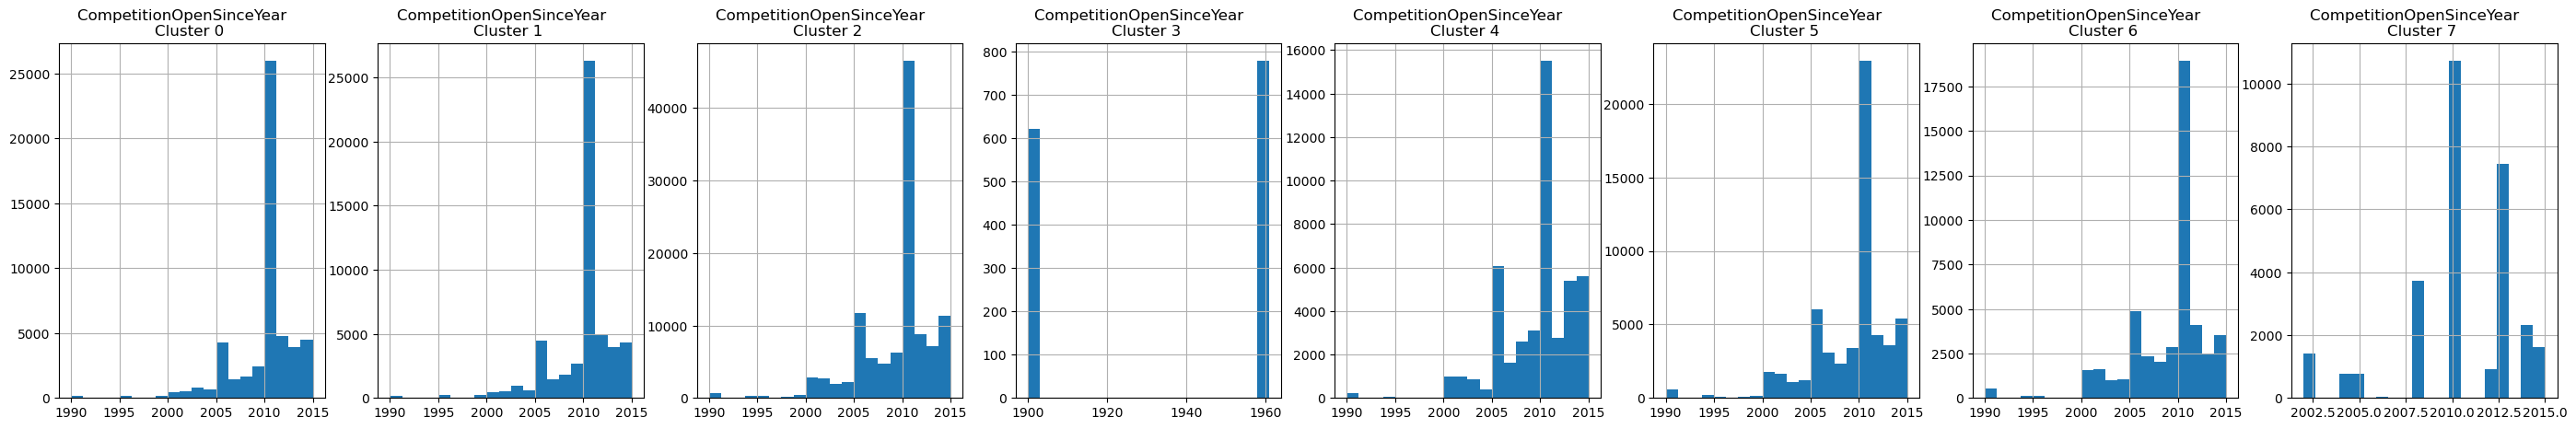

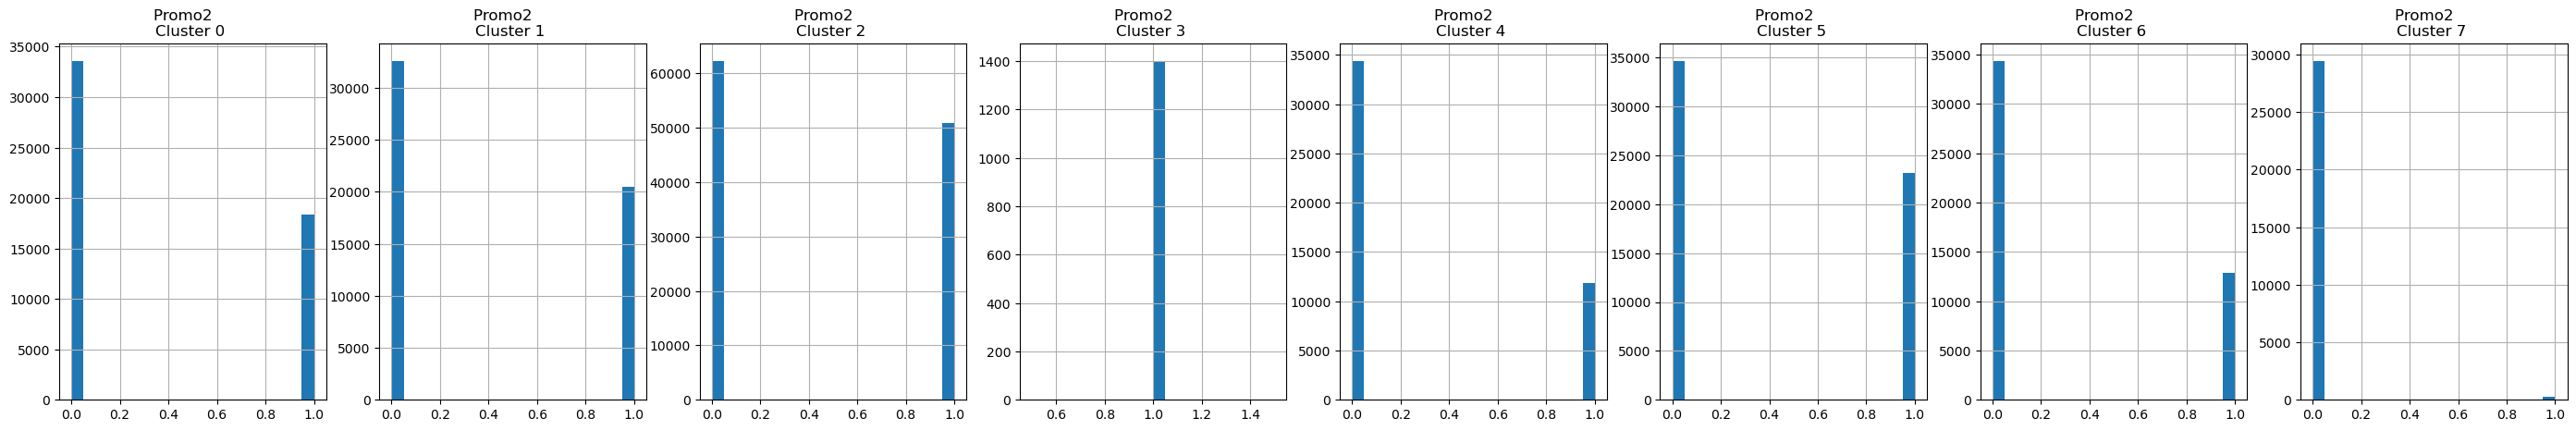

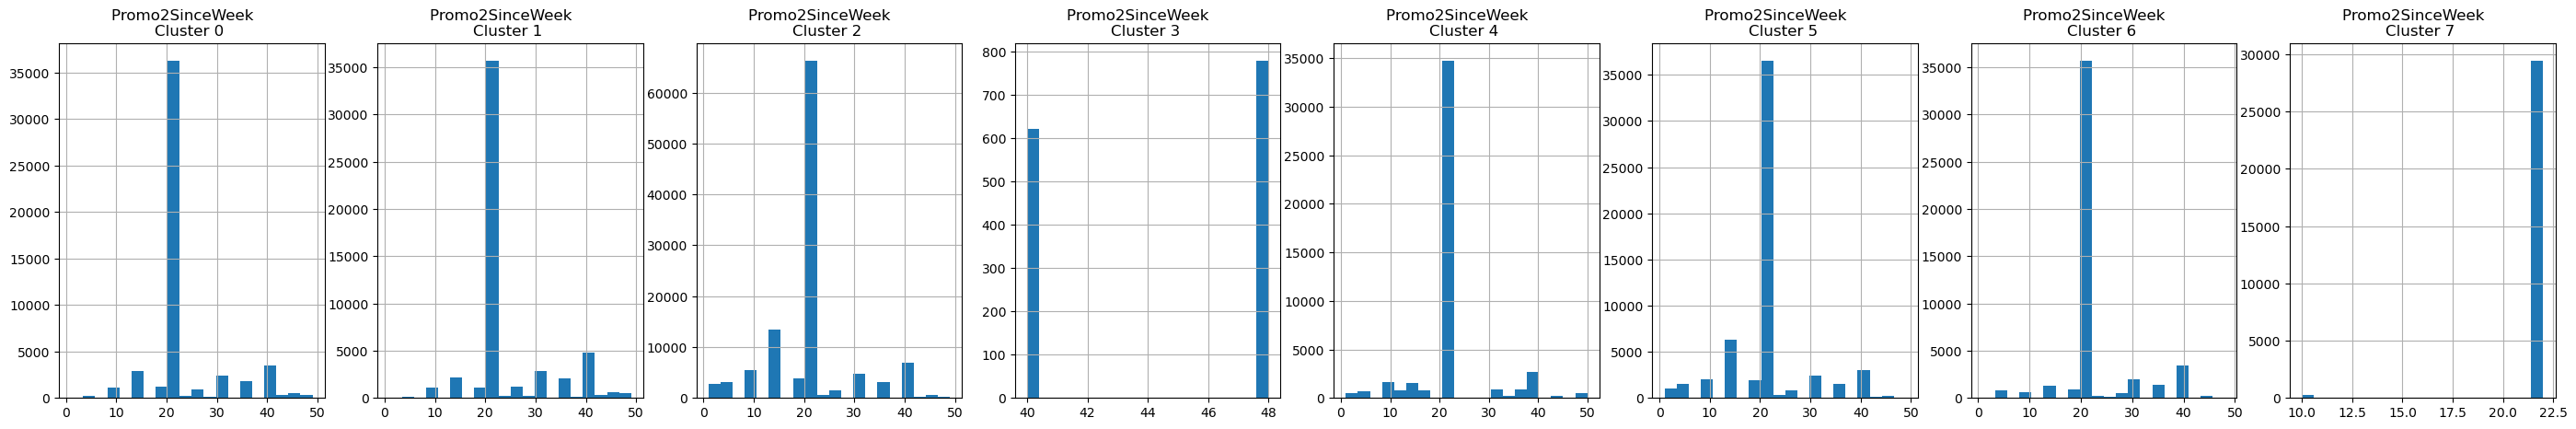

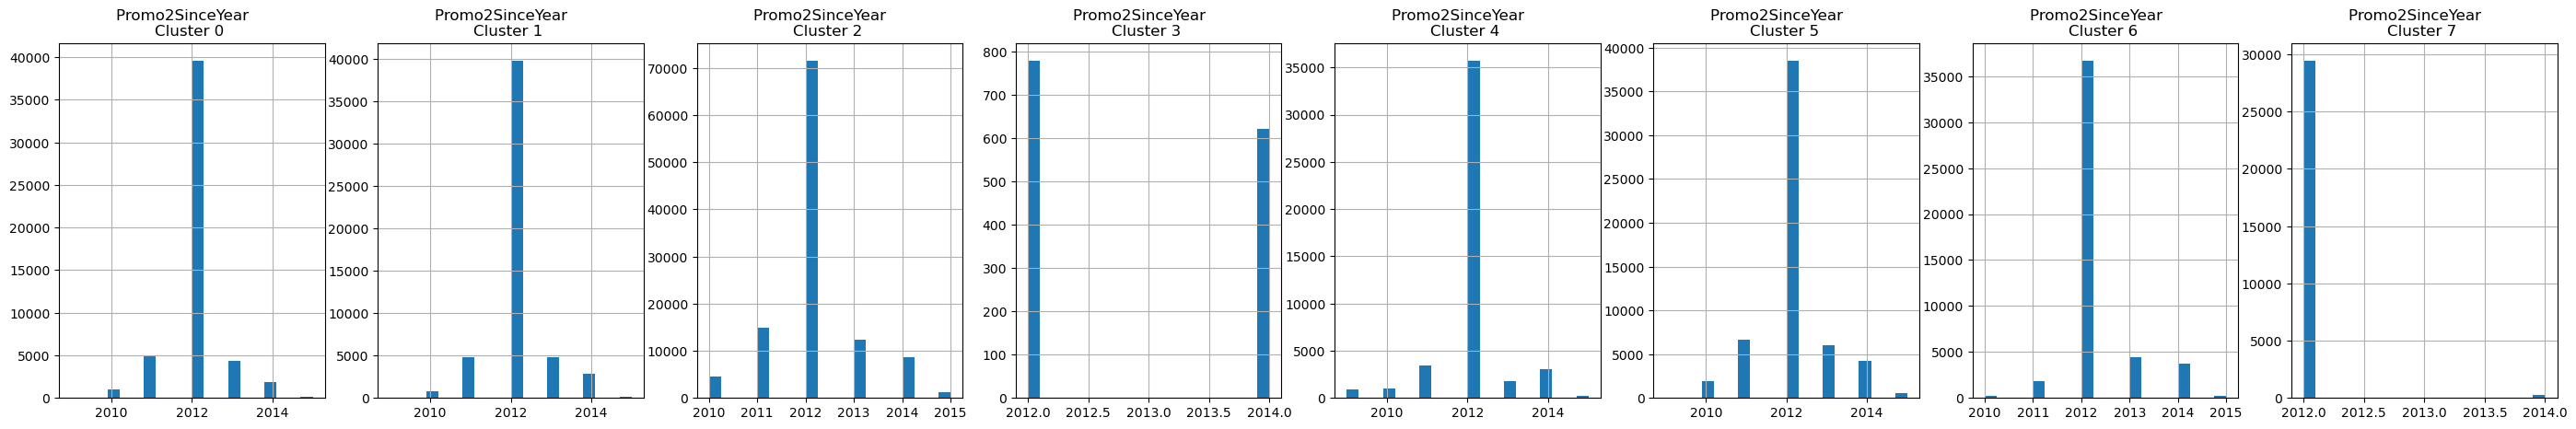

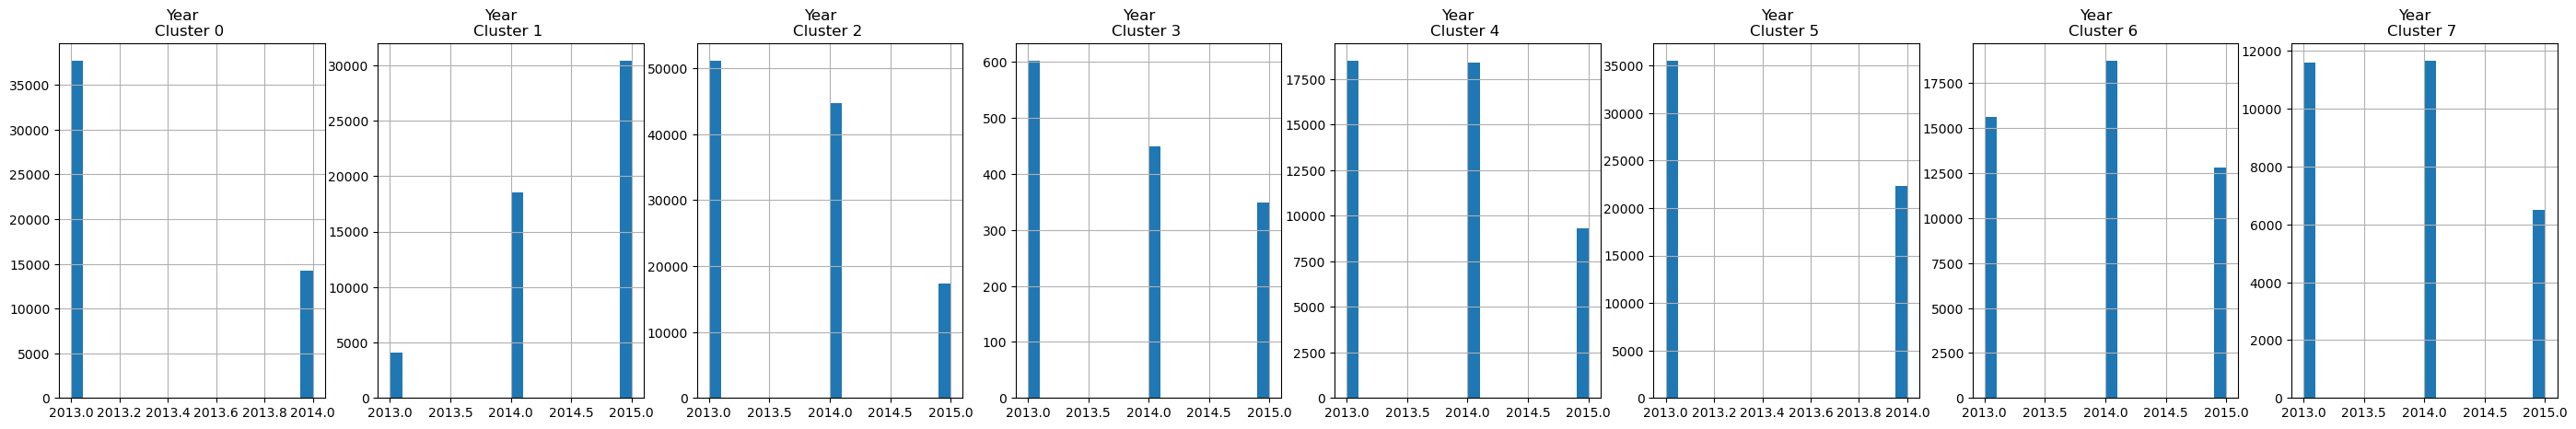

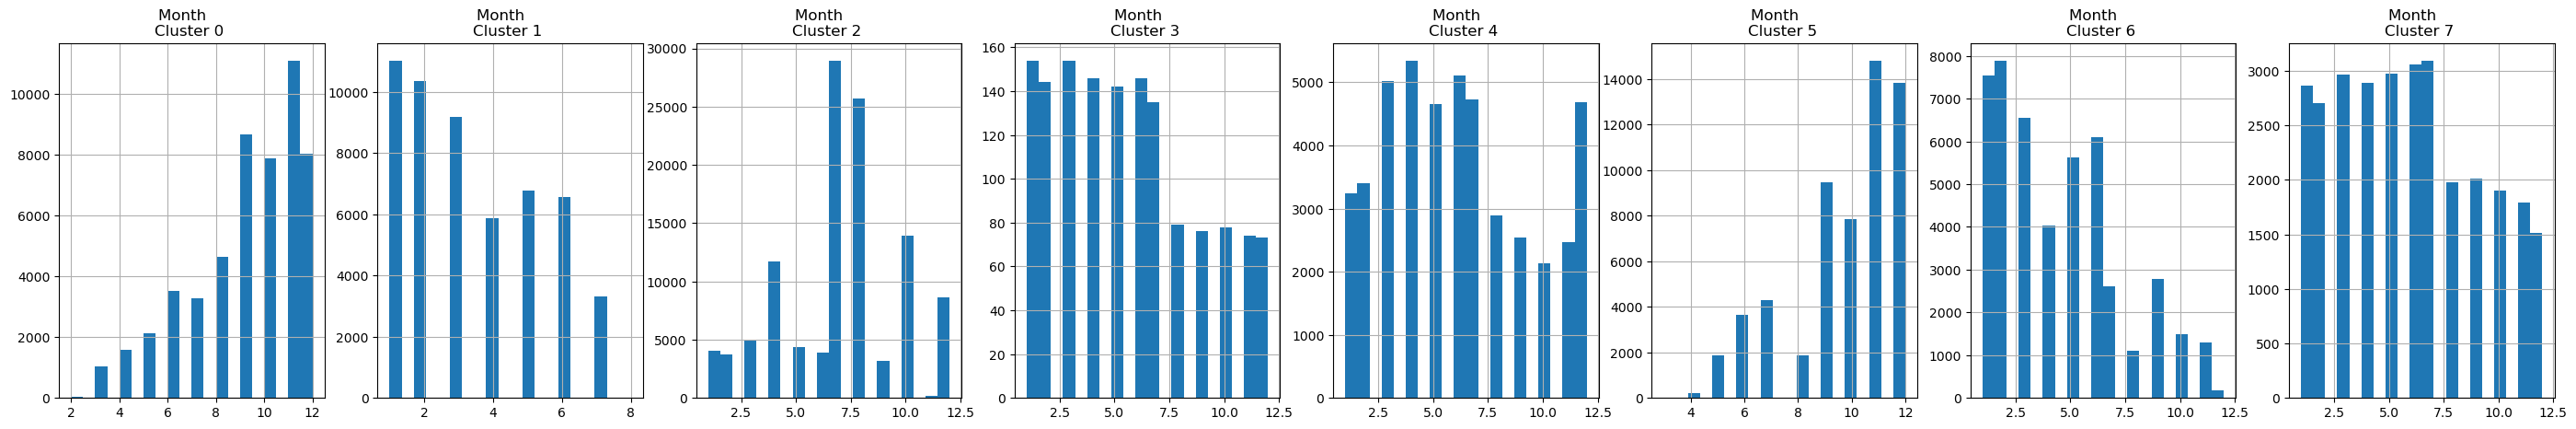

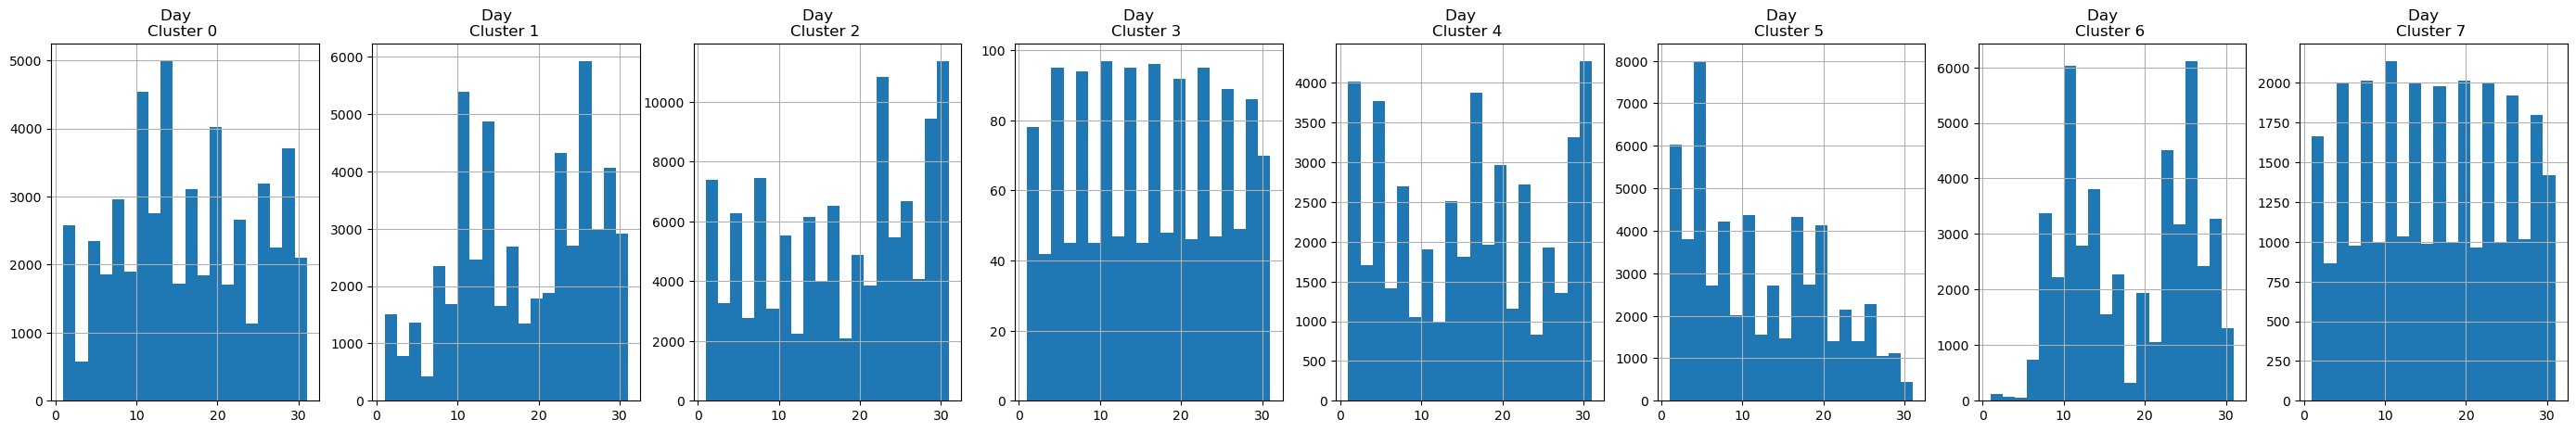

In [75]:
for i in sales_all.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = df_cluster[df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()



In [76]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_comp = pca.fit_transform(sc_sales_all)
principal_comp

array([[-0.30314242, -0.29394581],
       [-0.31848422, -1.41928247],
       [ 0.29421485, -0.56501327],
       ...,
       [ 1.18633087, -1.06499202],
       [ 1.06460098,  0.21137966],
       [ 1.94863807, -0.24629265]])

In [77]:
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-0.303142,-0.293946
1,-0.318484,-1.419282
2,0.294215,-0.565013
3,2.880536,0.798432
4,-0.400358,0.998568


In [78]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-0.303142,-0.293946,2
1,-0.318484,-1.419282,2
2,0.294215,-0.565013,2
3,2.880536,0.798432,4
4,-0.400358,0.998568,7


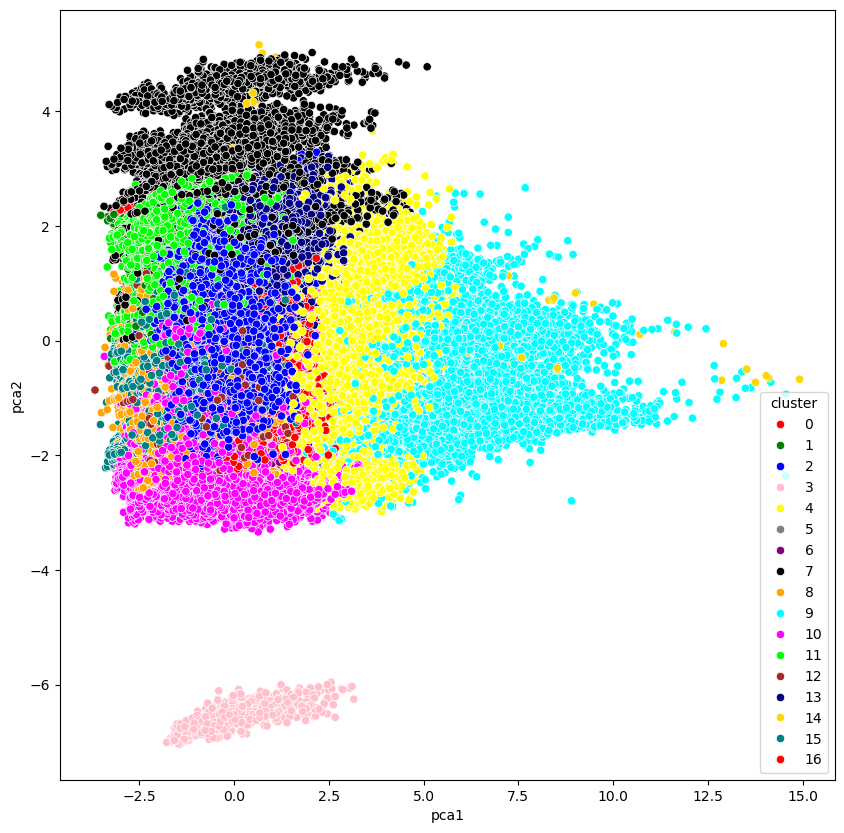

In [79]:
colors = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black', 
          'orange', 'cyan', 'magenta', 'lime', 'brown', 'navy', 'gold', 'teal']

plt.figure(figsize=(10, 10))
ax = sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=pca_df, palette=colors)
plt.show()

In [80]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import Adam

# Kích thước dữ liệu đầu vào
input_dim = 17  
encoding_dim = 10  

# ====== Tạo mô hình Autoencoder ======
input_df = Input(shape=(input_dim,))

# Encoder - Nén dữ liệu
x = Dense(7, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(x)

encoded = Dense(encoding_dim, activation='relu', kernel_initializer='glorot_uniform')(x)

# Decoder - Khôi phục dữ liệu
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)

decoded = Dense(input_dim, activation='sigmoid', kernel_initializer='glorot_uniform')(x)

# ====== Xây dựng mô hình ======
autoencoder = Model(input_df, decoded)  # Autoencoder đầy đủ
encoder = Model(input_df, encoded)  # Encoder riêng

# ====== Compile mô hình ======
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# ====== Hiển thị mô hình ======
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 17)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │           126 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │         4,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2000)           │     1,002,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │        20,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2000)           │        22,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 500)            │     1,000,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 17)             │         8,517 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,307,653 (8.80 MB)

 Trainable params: 2,307,653 (8.80 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
sc_sales_all.shape

(844392, 17)

In [82]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor="val_loss",  # Theo dõi validation loss
    patience=1,  # Nếu không cải thiện sau 5 epochs, dừng lại
    restore_best_weights=True,  # Lấy trọng số tốt nhất
    verbose=1
)

autoencoder.fit(sc_sales_all, sc_sales_all,
                batch_size=128,
                epochs=5,
                validation_split=0.2,  # Chia tập validation
                callbacks=[early_stopping],
                verbose=1)


Epoch 1/5
5278/5278 ━━━━━━━━━━━━━━━━━━━━ 166s 31ms/step - loss: 1.0033 - val_loss: 0.9901
Epoch 2/5
5278/5278 ━━━━━━━━━━━━━━━━━━━━ 165s 31ms/step - loss: 0.7386 - val_loss: 0.8060
Epoch 3/5
5278/5278 ━━━━━━━━━━━━━━━━━━━━ 162s 31ms/step - loss: 0.6765 - val_loss: 0.8661
Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 2.


In [83]:
pred = encoder.predict(sales_all)

26388/26388 ━━━━━━━━━━━━━━━━━━━━ 36s 1ms/step


In [84]:
pred.shape

(844392, 10)

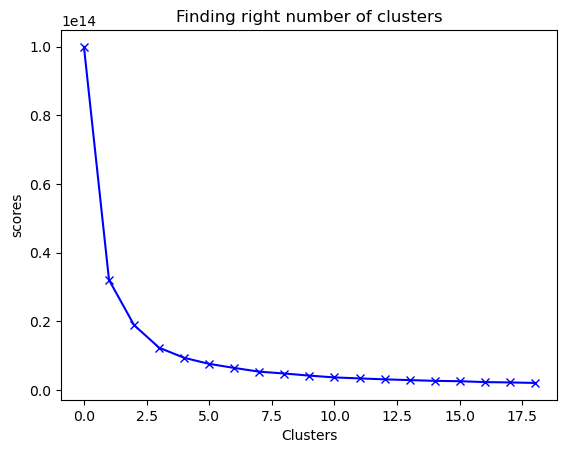

In [85]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

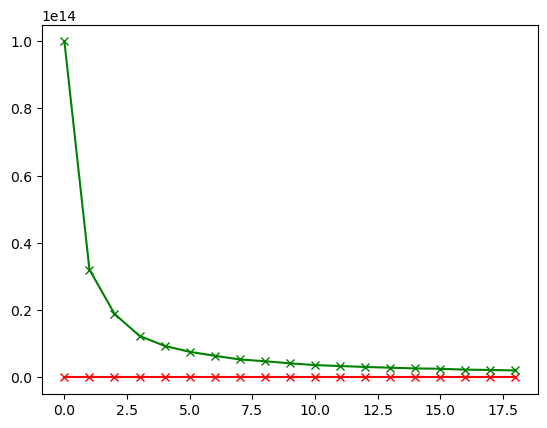

In [86]:
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')
plt.show()

In [87]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(sales_all)

In [88]:
data_clt = kmeans.cluster_centers_.shape
print(data_clt)

(4, 17)


In [89]:
df_cluster_dr = pd.concat([sales_all, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,cluster
0,5,5263,555,1,0.0,1,2,0,1270.0,9.0,2008.0,0,22.0,2012.0,2015,7,31,0
1,5,6064,625,1,0.0,1,0,0,570.0,11.0,2007.0,1,13.0,2010.0,2015,7,31,0
2,5,8314,821,1,0.0,1,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,2015,7,31,1
3,5,13995,1498,1,0.0,1,2,2,620.0,9.0,2009.0,0,22.0,2012.0,2015,7,31,0
4,5,4822,559,1,0.0,1,0,0,29910.0,4.0,2015.0,0,22.0,2012.0,2015,7,31,1


In [90]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-6494.134277,1144.781494
1,-6065.401367,868.843750
2,15328.139648,-4861.208984
3,-1995.759766,-426.846924
4,28649.816406,7240.541016


In [91]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-6494.134277,1144.781494,0
1,-6065.401367,868.843750,0
2,15328.139648,-4861.208984,1
3,-1995.759766,-426.846924,0
4,28649.816406,7240.541016,1


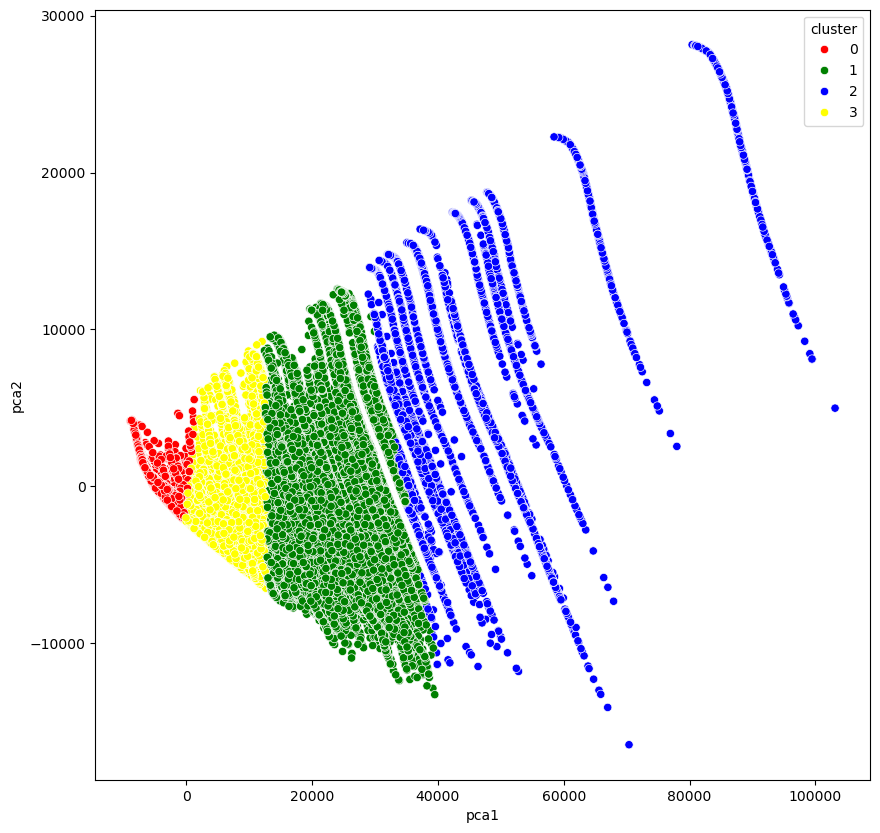

In [92]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()